# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [8]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Import the libraries
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, mannwhitneyu
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif

### **1.1 Load the Data**

In [11]:
# Load the dataset
emp_df1 = pd.read_csv('Employee_data.csv')

In [12]:
# Check the first few entries
emp_df1.head(10)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47.0,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93.0,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88.0,No,No,No,Excellent,Low,Stayed
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,...,4,Entry,Medium,75.0,No,No,No,Fair,Medium,Stayed
9,15944,24,Female,1,Healthcare,7319,Poor,High,Average,1,...,4,Entry,Large,NaN,No,No,Yes,Good,Low,Left


In [13]:
# Inspect the shape of the dataset
emp_df1.shape

(74610, 24)

In [14]:
# Inspect the different columns in the dataset
emp_df1.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [16]:
# Check the summary of the dataset
emp_df1.describe()


,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [18]:
# Check the info to see the types of the feature variables and the null values present
emp_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [22]:
# Check the number of missing values in each column
missing_values_count = emp_df1.isnull().sum()
print("Number of missing values:")
print(missing_values_count)

Number of missing values:
Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [24]:
# Check the percentage of missing values in each column
print("Percentage of missing values in each column:")
print(emp_df1.isnull().mean().apply(lambda x: round(x * 100, 2)))

Percentage of missing values in each column:
Employee ID                   0.00
Age                           0.00
Gender                        0.00
Years at Company              0.00
Job Role                      0.00
Monthly Income                0.00
Work-Life Balance             0.00
Job Satisfaction              0.00
Performance Rating            0.00
Number of Promotions          0.00
Overtime                      0.00
Distance from Home            2.56
Education Level               0.00
Marital Status                0.00
Number of Dependents          0.00
Job Level                     0.00
Company Size                  0.00
Company Tenure (In Months)    3.23
Remote Work                   0.00
Leadership Opportunities      0.00
Innovation Opportunities      0.00
Company Reputation            0.00
Employee Recognition          0.00
Attrition                     0.00
dtype: float64


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [26]:
# Handle the missing value rows in the column
# Dropping rows with missing values
emp_cleaned_df1 = emp_df1.dropna()
emp_cleaned_df1


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74604,11030,57,Male,12,Technology,8438,Excellent,Medium,High,0,...,2,Mid,Medium,27.0,No,No,Yes,Good,Medium,Stayed
74605,13450,44,Female,20,Healthcare,7578,Fair,Medium,Low,2,...,3,Mid,Large,52.0,No,No,No,Fair,Very High,Left
74607,36968,28,Female,3,Technology,9763,Poor,Low,Average,0,...,3,Senior,Small,67.0,No,No,No,Poor,Medium,Left
74608,24276,37,Male,3,Education,3644,Fair,High,Average,2,...,4,Entry,Medium,16.0,No,No,No,Excellent,Medium,Stayed


2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [28]:
# Check the percentage of remaining data after missing values are removed
remaining_ratio = emp_cleaned_df1.shape[0] / emp_df1.shape[0]
print(f"Percentage remaining after dropping missing values: {remaining_ratio * 100:.2f}%")


Percentage remaining after dropping missing values: 94.67%


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [31]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def show_categorical_unique_values(df):
    print("Unique values in categorical columns are:\n")
    categorical_columns = df.select_dtypes(include='object').columns
    for col in categorical_columns:
        unique_vals = df[col].unique()
        print(f"{col} ({len(unique_vals)} unique): {unique_vals}\n")

In [32]:
# Check the data
show_categorical_unique_values(emp_cleaned_df1)

Unique values in categorical columns are:

Gender (2 unique): ['Male' 'Female']

Job Role (5 unique): ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

Work-Life Balance (4 unique): ['Excellent' 'Poor' 'Good' 'Fair']

Job Satisfaction (4 unique): ['Medium' 'High' 'Very High' 'Low']

Performance Rating (4 unique): ['Average' 'Low' 'High' 'Below Average']

Overtime (2 unique): ['No' 'Yes']

Education Level (5 unique): ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']

Marital Status (3 unique): ['Married' 'Divorced' 'Single']

Job Level (3 unique): ['Mid' 'Senior' 'Entry']

Company Size (3 unique): ['Medium' 'Small' 'Large']

Remote Work (2 unique): ['No' 'Yes']

Leadership Opportunities (2 unique): ['No' 'Yes']

Innovation Opportunities (2 unique): ['No' 'Yes']

Company Reputation (4 unique): ['Excellent' 'Fair' 'Poor' 'Good']

Employee Recognition (4 unique): ['Medium' 'Low' 'High' 'Very High']

Attrition (2 unique): ['Stayed' 'Left']



### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [35]:
# Drop redundant columns which are not required for modelling
# Define target and features
X = emp_cleaned_df1.drop(columns=['Attrition', 'Employee ID'])
y = emp_cleaned_df1['Attrition'].apply(lambda x: 1 if x == 'Left' else 0)

# 1. Correlation Analysis (Numerical)
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = X[numerical_columns].corr()

print("Correlation Matrix:\n", correlation_matrix)

# Identify features with high correlation (> 0.8)
highly_correlated_features = {
    correlation_matrix.columns[i]
    for i in range(len(correlation_matrix.columns))
    for j in range(i)
    if abs(correlation_matrix.iloc[i, j]) > 0.8
}

print("\nHighly Correlated Features:", highly_correlated_features)

# 2. Chi-Square Test (Categorical)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
chi_square_results = {}

for col in categorical_columns:
    contingency = pd.crosstab(X[col], y)
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    chi_square_results[col] = {'Chi2': chi2_stat, 'P-Value': p_val}

print("\nChi-Square Test Results:\n", pd.DataFrame(chi_square_results).T)

# 3. Mann-Whitney U Test (Numerical)
mann_whitney_results = {}

for col in numerical_columns:
    group_left = X[col][y == 0]
    group_stayed = X[col][y == 1]

    if len(group_left) > 1 and len(group_stayed) > 1:
        stat, p_val = mannwhitneyu(group_left, group_stayed, alternative='two-sided')
        mann_whitney_results[col] = {'Statistic': stat, 'P-Value': p_val}

print("\nMann-Whitney U Test Results:\n", pd.DataFrame(mann_whitney_results).T)

# 4. Low Variance Filter
variance_selector = VarianceThreshold(threshold=0.01)
X_high_variance = variance_selector.fit_transform(X[numerical_columns])
low_variance_features = set(numerical_columns) - set(numerical_columns[variance_selector.get_support()])

print("\nLow Variance Features:", low_variance_features)

# 5. Mutual Information
mutual_info_scores = mutual_info_classif(X[numerical_columns], y, discrete_features=False)
mutual_info_df = pd.DataFrame({
    'Feature': numerical_columns,
    'Mutual Information': mutual_info_scores
}).sort_values(by='Mutual Information', ascending=False)

print("\nMutual Information Scores:\n", mutual_info_df)

# 6. Feature Importance from Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X[numerical_columns], y)

feature_importances = pd.DataFrame({
    'Feature': numerical_columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest):\n", feature_importances)

# 7. Aggregate Redundant Features
redundant_features = set()
redundant_features.update(highly_correlated_features)
redundant_features.update(low_variance_features)
redundant_features.update([col for col in chi_square_results if chi_square_results[col]['P-Value'] > 0.05])
redundant_features.update([col for col in mann_whitney_results if mann_whitney_results[col]['P-Value'] > 0.05])

print("\nSuggested Redundant Features to Drop:", redundant_features)



Correlation Matrix:
                                  Age  Years at Company  Monthly Income  \
Age                         1.000000          0.536662       -0.004119   
Years at Company            0.536662          1.000000       -0.008100   
Monthly Income             -0.004119         -0.008100        1.000000   
Number of Promotions        0.000386          0.001182        0.001976   
Distance from Home         -0.005318         -0.005371       -0.001872   
Number of Dependents        0.002780          0.003972       -0.002343   
Company Tenure (In Months)  0.236282          0.442670       -0.011297   

                            Number of Promotions  Distance from Home  \
Age                                     0.000386           -0.005318   
Years at Company                        0.001182           -0.005371   
Monthly Income                          0.001976           -0.001872   
Number of Promotions                    1.000000           -0.007478   
Distance from Home        

In [36]:
#Drop Employee Recognition (not predictive) and Employee ID (just a unique identifierdoesn't help predict anything.)
columns_to_remove = ['Employee ID', 'Employee Recognition']
emp_cleaned_df1 =emp_cleaned_df1.drop(columns=columns_to_remove)

In [37]:
# Check first few rows of data
emp_cleaned_df1.head()


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,Married,0,Mid,Medium,89.0,No,No,No,Excellent,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,Divorced,3,Mid,Medium,21.0,No,No,No,Fair,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,Married,3,Mid,Medium,74.0,No,No,No,Poor,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,Single,2,Mid,Small,50.0,Yes,No,No,Good,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,Divorced,0,Senior,Medium,68.0,No,No,No,Fair,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [40]:
# Import Train Test Split
from sklearn.model_selection import train_test_split


### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [42]:
# Put all the feature variables in X
X = emp_cleaned_df1.drop(columns=['Attrition'])

# Put the target variable in y
y = emp_cleaned_df1['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [44]:
# Split the data into 70% train data and 30% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the split sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")


Training set size: 49444
Validation set size: 21191


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [49]:
# Select numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns are:", numerical_cols)

Numerical Columns are: ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>


Age - Stats:
count    49444.000000
mean        38.516686
std         12.077142
min         18.000000
25%         28.000000
50%         39.000000
75%         49.000000
max         59.000000
Name: Age, dtype: float64
Skew: -0.00, Kurtosis: -1.19


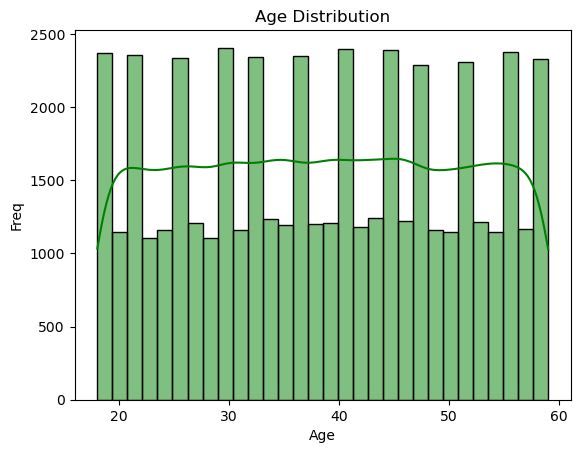


Years at Company - Stats:
count    49444.000000
mean        15.686696
std         11.211699
min          1.000000
25%          7.000000
50%         13.000000
75%         23.000000
max         51.000000
Name: Years at Company, dtype: float64
Skew: 0.79, Kurtosis: -0.13


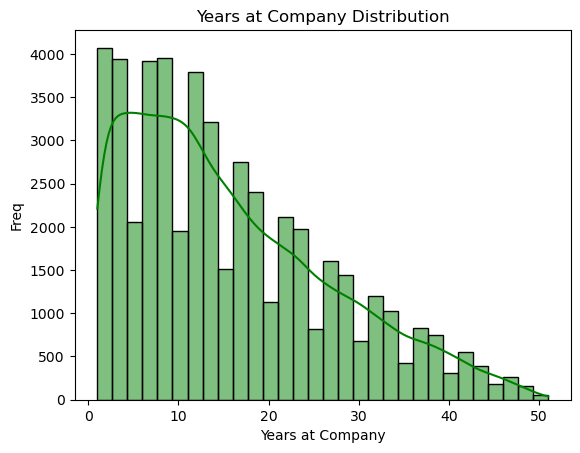


Monthly Income - Stats:
count    49444.000000
mean      7347.359538
std       2565.729557
min       1226.000000
25%       5658.000000
50%       7367.500000
75%       8880.000000
max      50030.000000
Name: Monthly Income, dtype: float64
Skew: 4.96, Kurtosis: 80.21


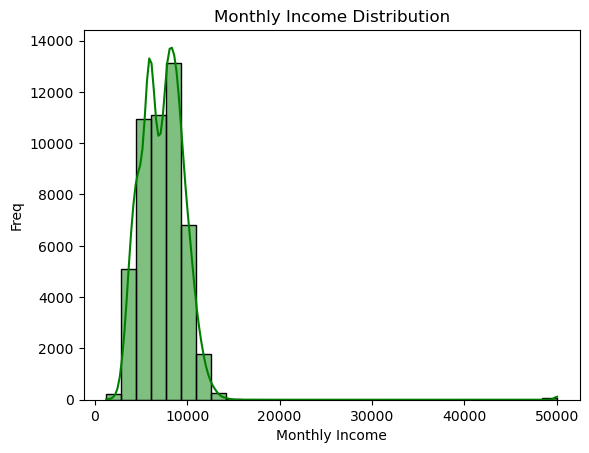


Number of Promotions - Stats:
count    49444.000000
mean         0.835187
std          0.996423
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Number of Promotions, dtype: float64
Skew: 1.00, Kurtosis: 0.20


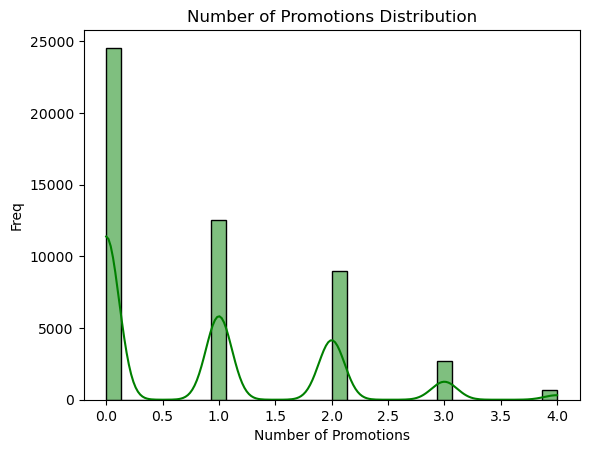


Distance from Home - Stats:
count    49444.000000
mean        49.888601
std         28.510404
min          1.000000
25%         25.000000
50%         50.000000
75%         74.000000
max         99.000000
Name: Distance from Home, dtype: float64
Skew: 0.00, Kurtosis: -1.19


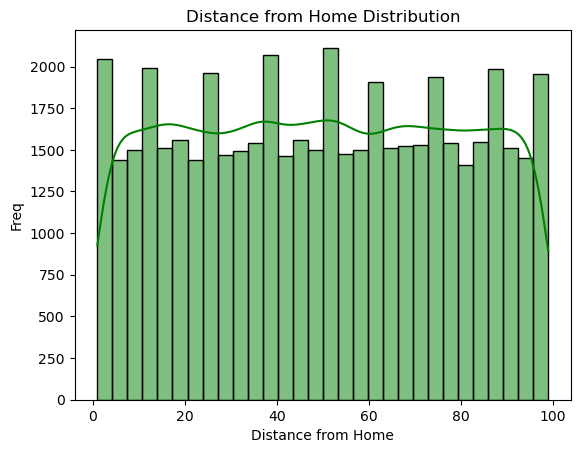


Number of Dependents - Stats:
count    49444.000000
mean         1.655024
std          1.575817
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         15.000000
Name: Number of Dependents, dtype: float64
Skew: 0.90, Kurtosis: 1.36


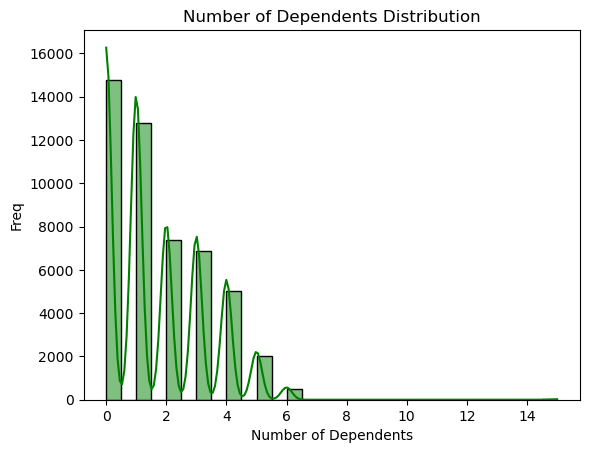


Company Tenure (In Months) - Stats:
count    49444.000000
mean        55.730908
std         25.402513
min          2.000000
25%         36.000000
50%         56.000000
75%         75.000000
max        128.000000
Name: Company Tenure (In Months), dtype: float64
Skew: 0.06, Kurtosis: -0.79


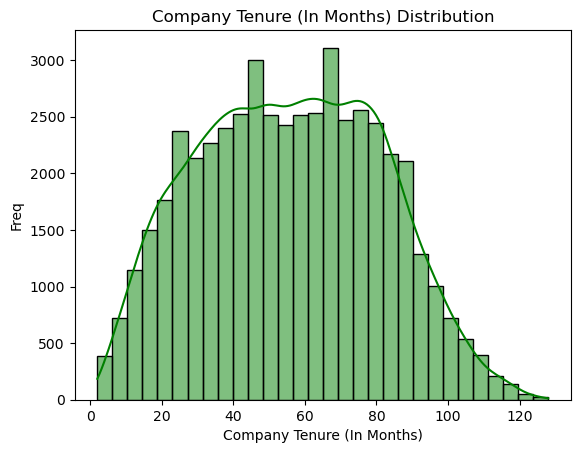

In [51]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Loop through each numerical column
for col in numerical_cols:
    print(f"\n{col} - Stats:\n{X_train[col].describe()}")
    print(f"Skew: {X_train[col].skew():.2f}, Kurtosis: {X_train[col].kurt():.2f}")

    sns.histplot(X_train[col], kde=True, bins=30, color='green')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Freq")
    plt.show()


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

Numerical Feature Correlations:
                                  Age  Years at Company  Monthly Income  \
Age                         1.000000          0.535486       -0.005585   
Years at Company            0.535486          1.000000       -0.007207   
Monthly Income             -0.005585         -0.007207        1.000000   
Number of Promotions        0.004905         -0.000719        0.001904   
Distance from Home         -0.005594         -0.002825       -0.001794   
Number of Dependents        0.004340          0.003188       -0.005513   
Company Tenure (In Months)  0.236568          0.444810       -0.008125   

                            Number of Promotions  Distance from Home  \
Age                                     0.004905           -0.005594   
Years at Company                       -0.000719           -0.002825   
Monthly Income                          0.001904           -0.001794   
Number of Promotions                    1.000000           -0.006778   
Distance from 

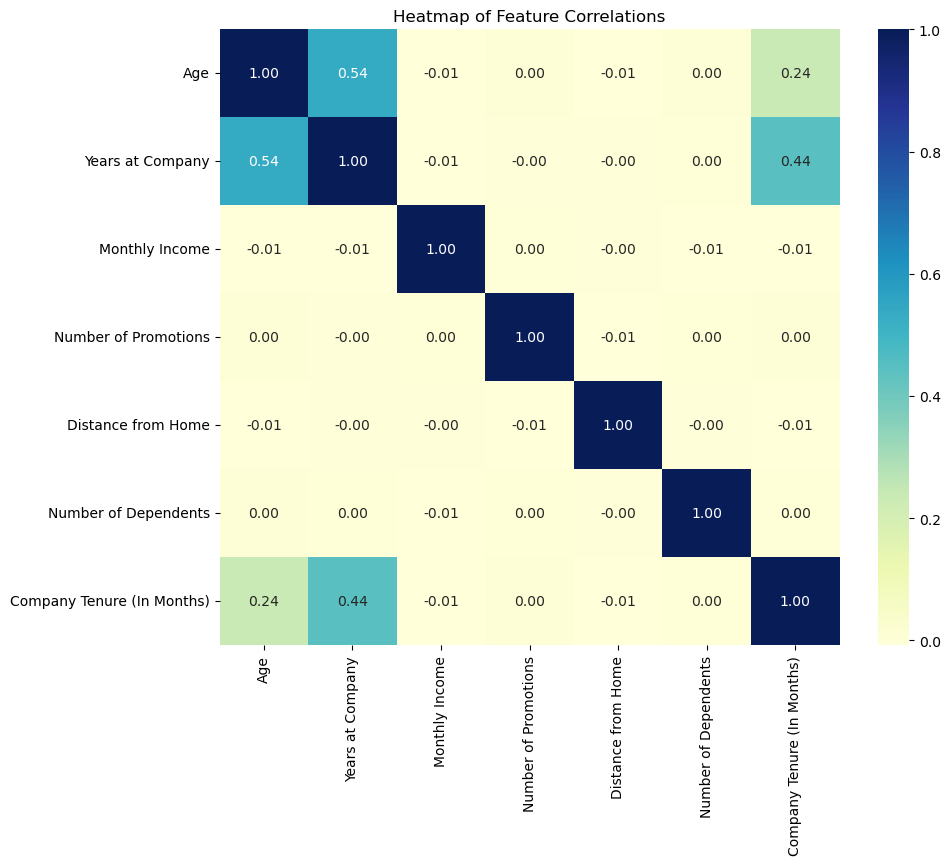

In [54]:
# Create correlation matrix for numerical columns
corr_matrix = X_train[numerical_cols].corr()
print("Numerical Feature Correlations:\n", corr_matrix)
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Heatmap of Feature Correlations")
plt.show()


### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

Class Counts:
Attrition
Left      23659
Stayed    25785
Name: count, dtype: int64

Class Proportions (%):
Attrition
Left      47.850093
Stayed    52.149907
Name: proportion, dtype: float64



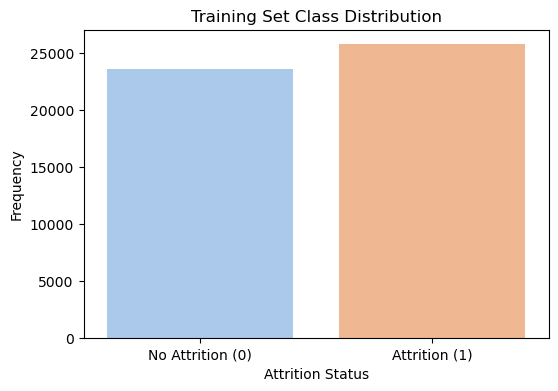

In [57]:
# Plot a bar chart to check class balance
# Calculate class counts
counts = y_train.value_counts().sort_index()
percentages = y_train.value_counts(normalize=True).sort_index() * 100
# Print class counts and proportions
print(f"Class Counts:\n{counts}\n")
print(f"Class Proportions (%):\n{percentages}\n")
# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='pastel')
plt.title("Training Set Class Distribution")
plt.xlabel("Attrition Status")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['No Attrition (0)', 'Attrition (1)'])
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

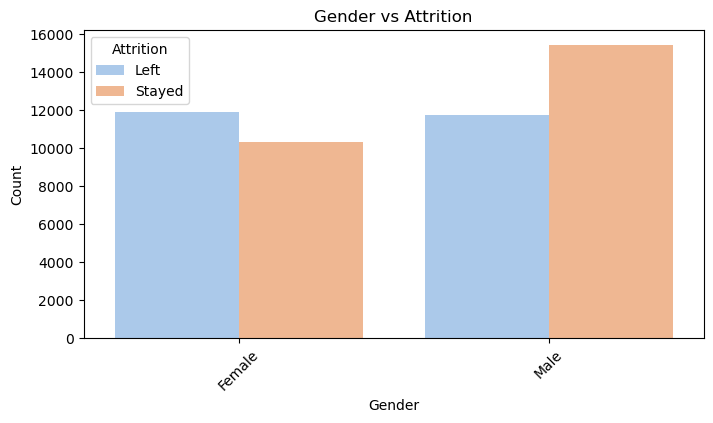

Frequency Distribution for Gender:
Gender
Male      27196
Female    22248
Name: count, dtype: int64

Percentage Distribution for Gender:
Gender
Male      55.00364
Female    44.99636
Name: count, dtype: float64

Chi-square Test for Gender and Attrition:
Chi2 Stat: 513.9875387180404, p-value: 8.602941503156877e-114
Degrees of Freedom: 1
Expected Frequencies:
[[10645.68869833 11602.31130167]
 [13013.31130167 14182.68869833]]
--------------------------------------------------


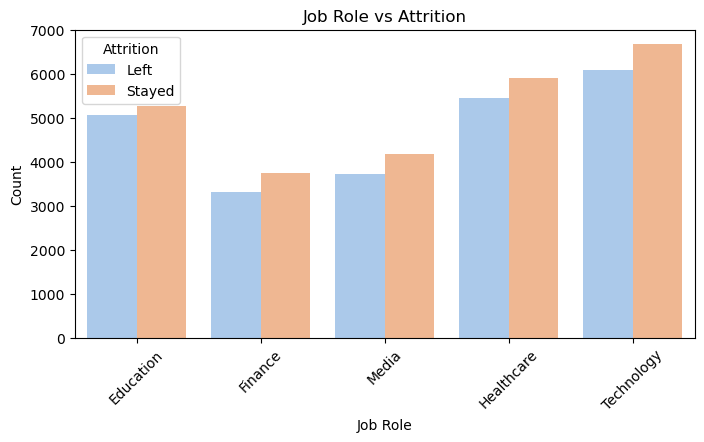

Frequency Distribution for Job Role:
Job Role
Technology    12770
Healthcare    11369
Education     10345
Media          7915
Finance        7045
Name: count, dtype: int64

Percentage Distribution for Job Role:
Job Role
Technology    25.827198
Healthcare    22.993690
Education     20.922660
Media         16.008009
Finance       14.248443
Name: count, dtype: float64

Chi-square Test for Job Role and Attrition:
Chi2 Stat: 9.44856562787336, p-value: 0.05081490585889384
Degrees of Freedom: 4
Expected Frequencies:
[[4950.09212442 5394.90787558]
 [3371.03905428 3673.96094572]
 [5440.0770771  5928.9229229 ]
 [3787.33486368 4127.66513632]
 [6110.45688051 6659.54311949]]
--------------------------------------------------


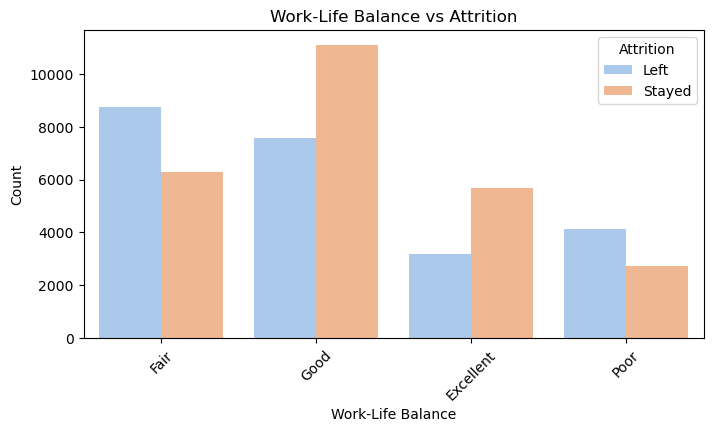

Frequency Distribution for Work-Life Balance:
Work-Life Balance
Good         18668
Fair         15041
Excellent     8867
Poor          6868
Name: count, dtype: int64

Percentage Distribution for Work-Life Balance:
Work-Life Balance
Good         37.755845
Fair         30.420273
Excellent    17.933420
Poor         13.890462
Name: count, dtype: float64

Chi-square Test for Work-Life Balance and Attrition:
Chi2 Stat: 1974.4707276191436, p-value: 0.0
Degrees of Freedom: 3
Expected Frequencies:
[[4242.86774937 4624.13225063]
 [7197.13249333 7843.86750667]
 [8932.65536769 9735.34463231]
 [3286.34438961 3581.65561039]]
--------------------------------------------------


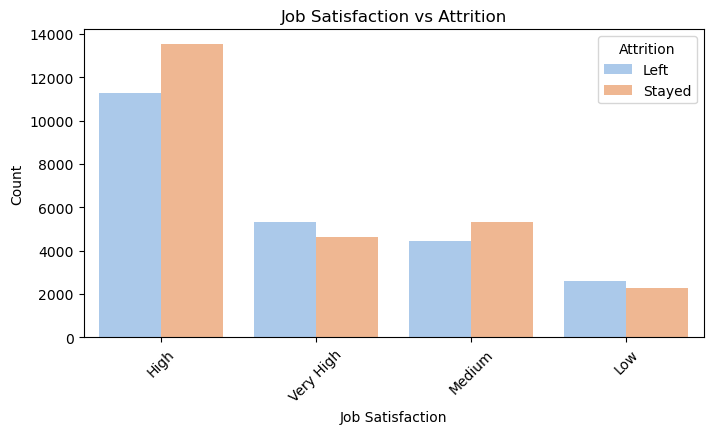

Frequency Distribution for Job Satisfaction:
Job Satisfaction
High         24811
Very High     9988
Medium        9742
Low           4903
Name: count, dtype: int64

Percentage Distribution for Job Satisfaction:
Job Satisfaction
High         50.180002
Very High    20.200631
Medium       19.703098
Low           9.916269
Name: count, dtype: float64

Chi-square Test for Job Satisfaction and Attrition:
Chi2 Stat: 257.5442021721337, p-value: 1.5276701873678314e-55
Degrees of Freedom: 3
Expected Frequencies:
[[11872.0865828  12938.9134172 ]
 [ 2346.09006148  2556.90993852]
 [ 4661.55606343  5080.44393657]
 [ 4779.26729229  5208.73270771]]
--------------------------------------------------


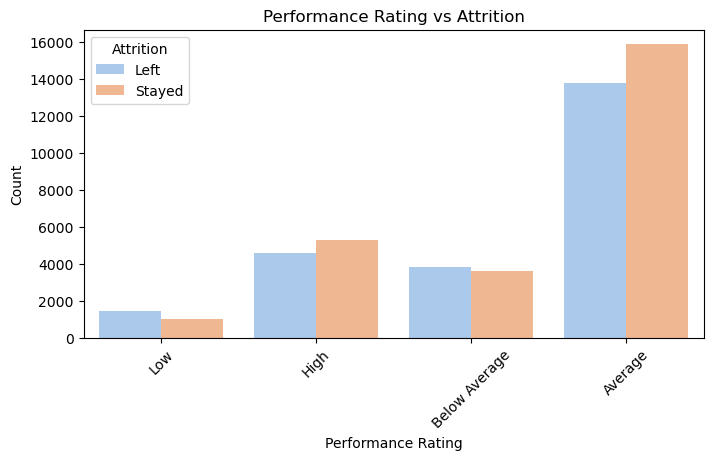

Frequency Distribution for Performance Rating:
Performance Rating
Average          29662
High              9862
Below Average     7440
Low               2480
Name: count, dtype: int64

Percentage Distribution for Performance Rating:
Performance Rating
Average          59.991101
High             19.945797
Below Average    15.047326
Low               5.015775
Name: count, dtype: float64

Chi-square Test for Performance Rating and Attrition:
Chi2 Stat: 179.04615894396642, p-value: 1.4172574466460347e-38
Degrees of Freedom: 3
Expected Frequencies:
[[14193.29459591 15468.70540409]
 [ 3560.04692177  3879.95307823]
 [ 4718.97617507  5143.02382493]
 [ 1186.68230726  1293.31769274]]
--------------------------------------------------


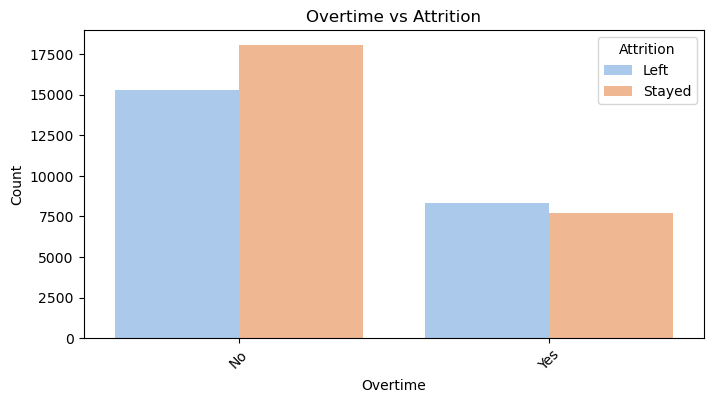

Frequency Distribution for Overtime:
Overtime
No     33396
Yes    16048
Name: count, dtype: int64

Percentage Distribution for Overtime:
Overtime
No     67.543079
Yes    32.456921
Name: count, dtype: float64

Chi-square Test for Overtime and Attrition:
Chi2 Stat: 162.76690498136745, p-value: 2.8128350585119693e-37
Degrees of Freedom: 1
Expected Frequencies:
[[15980.01706982 17415.98293018]
 [ 7678.98293018  8369.01706982]]
--------------------------------------------------


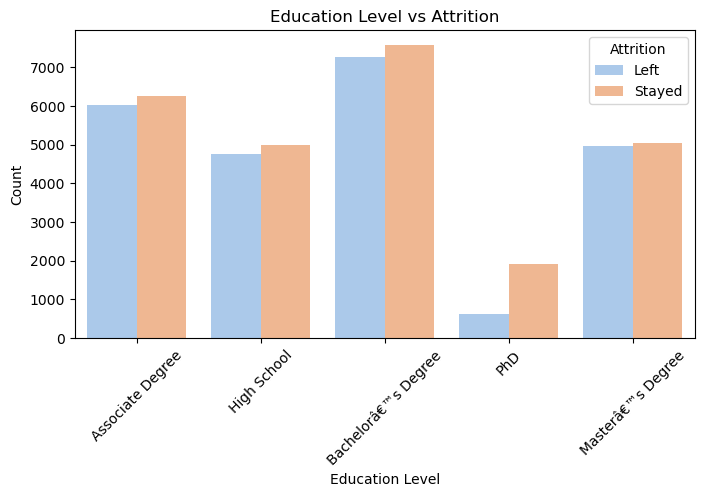

Frequency Distribution for Education Level:
Education Level
Bachelorâ€™s Degree    14855
Associate Degree       12290
Masterâ€™s Degree      10009
High School             9746
PhD                     2544
Name: count, dtype: int64

Percentage Distribution for Education Level:
Education Level
Bachelorâ€™s Degree    30.044090
Associate Degree       24.856403
Masterâ€™s Degree      20.243103
High School            19.711188
PhD                     5.145215
Name: count, dtype: float64

Chi-square Test for Education Level and Attrition:
Chi2 Stat: 580.351263052282, p-value: 2.7699981019866975e-124
Degrees of Freedom: 4
Expected Frequencies:
[[5880.77643395 6409.22356605]
 [7108.13132028 7746.86867972]
 [4663.47006715 5082.52993285]
 [4789.31581183 5219.68418817]
 [1217.3063668  1326.6936332 ]]
--------------------------------------------------


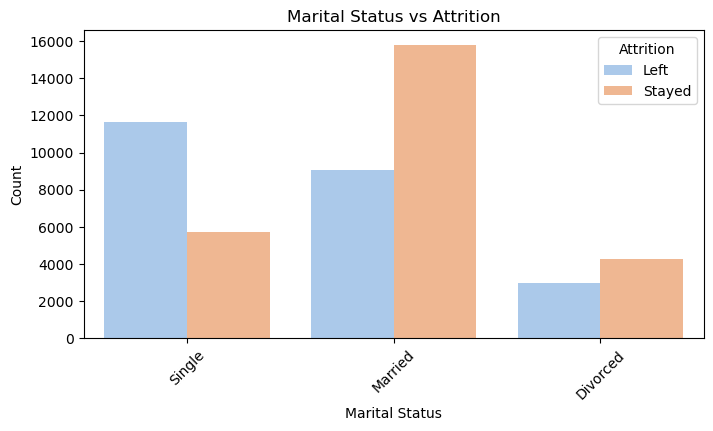

Frequency Distribution for Marital Status:
Marital Status
Married     24870
Single      17370
Divorced     7204
Name: count, dtype: int64

Percentage Distribution for Marital Status:
Marital Status
Married     50.299329
Single      35.130653
Divorced    14.570019
Name: count, dtype: float64

Chi-square Test for Marital Status and Attrition:
Chi2 Stat: 4018.7165949560676, p-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[ 3447.12070221  3756.87929779]
 [11900.31813769 12969.68186231]
 [ 8311.5611601   9058.4388399 ]]
--------------------------------------------------


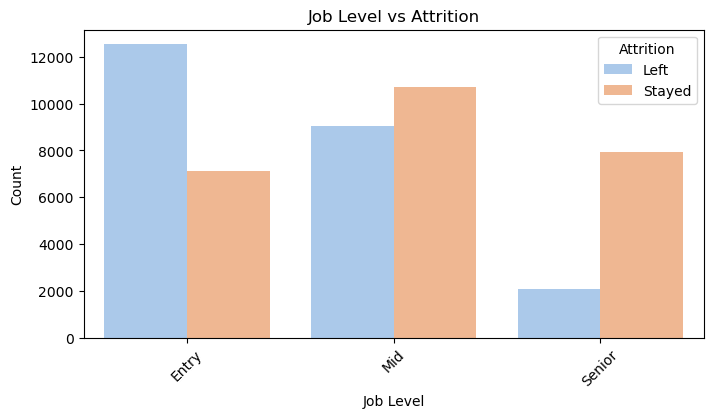

Frequency Distribution for Job Level:
Job Level
Mid       19753
Entry     19668
Senior    10023
Name: count, dtype: int64

Percentage Distribution for Job Level:
Job Level
Mid       39.950247
Entry     39.778335
Senior    20.271418
Name: count, dtype: float64

Chi-square Test for Job Level and Attrition:
Chi2 Stat: 4976.583498969303, p-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[ 9411.15629803 10256.84370197]
 [ 9451.82887711 10301.17112289]
 [ 4796.01482485  5226.98517515]]
--------------------------------------------------


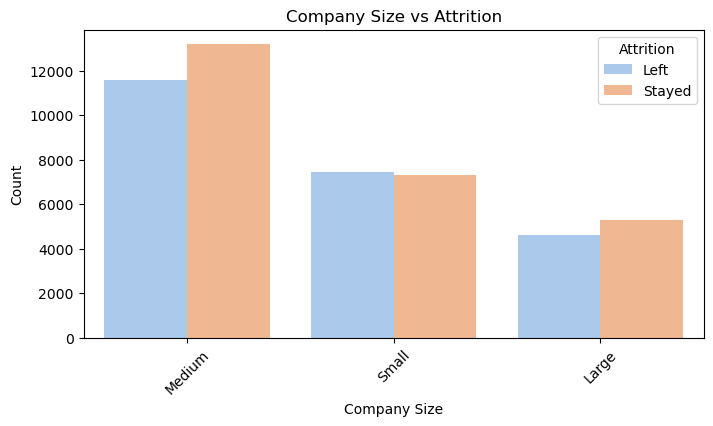

Frequency Distribution for Company Size:
Company Size
Medium    24769
Small     14779
Large      9896
Name: count, dtype: int64

Percentage Distribution for Company Size:
Company Size
Medium    50.095057
Small     29.890381
Large     20.014562
Name: count, dtype: float64

Chi-square Test for Company Size and Attrition:
Chi2 Stat: 56.80333710826491, p-value: 4.627133929829905e-13
Degrees of Freedom: 2
Expected Frequencies:
[[ 4735.2452067   5160.7547933 ]
 [11851.98954373 12917.01045627]
 [ 7071.76524958  7707.23475042]]
--------------------------------------------------


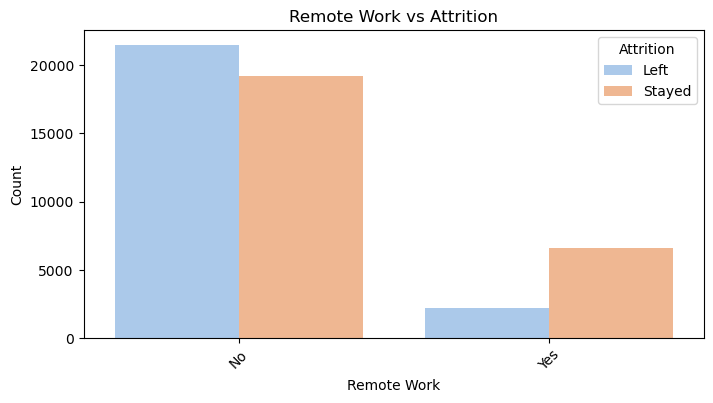

Frequency Distribution for Remote Work:
Remote Work
No     40665
Yes     8779
Name: count, dtype: int64

Percentage Distribution for Remote Work:
Remote Work
No     82.24456
Yes    17.75544
Name: count, dtype: float64

Chi-square Test for Remote Work and Attrition:
Chi2 Stat: 2265.3005734058006, p-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
[[19458.2403325 21206.7596675]
 [ 4200.7596675  4578.2403325]]
--------------------------------------------------


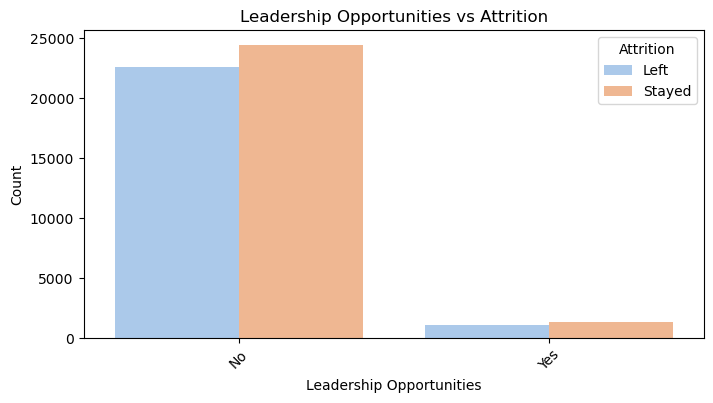

Frequency Distribution for Leadership Opportunities:
Leadership Opportunities
No     47028
Yes     2416
Name: count, dtype: int64

Percentage Distribution for Leadership Opportunities:
Leadership Opportunities
No     95.113664
Yes     4.886336
Name: count, dtype: float64

Chi-square Test for Leadership Opportunities and Attrition:
Chi2 Stat: 13.987336049848079, p-value: 0.00018404609077353443
Degrees of Freedom: 1
Expected Frequencies:
[[22502.94175229 24525.05824771]
 [ 1156.05824771  1259.94175229]]
--------------------------------------------------


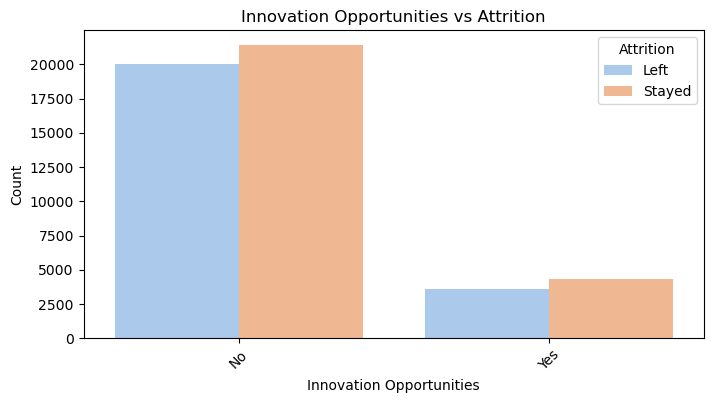

Frequency Distribution for Innovation Opportunities:
Innovation Opportunities
No     41464
Yes     7980
Name: count, dtype: int64

Percentage Distribution for Innovation Opportunities:
Innovation Opportunities
No     83.860529
Yes    16.139471
Name: count, dtype: float64

Chi-square Test for Innovation Opportunities and Attrition:
Chi2 Stat: 22.755879865241834, p-value: 1.8394047508612188e-06
Degrees of Freedom: 1
Expected Frequencies:
[[19840.56257584 21623.43742416]
 [ 3818.43742416  4161.56257584]]
--------------------------------------------------


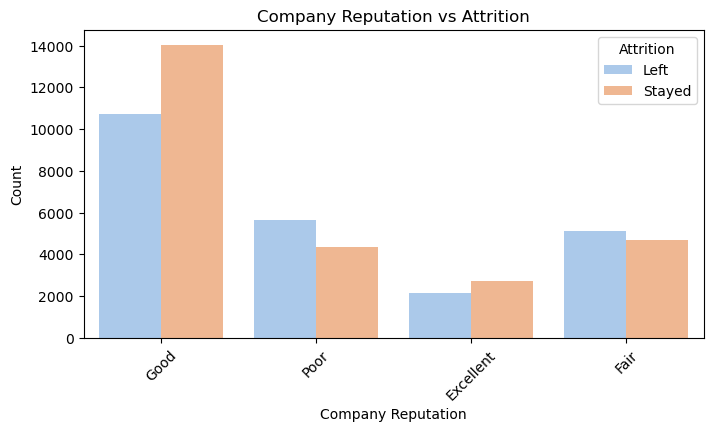

Frequency Distribution for Company Reputation:
Company Reputation
Good         24755
Poor         10013
Fair          9810
Excellent     4866
Name: count, dtype: int64

Percentage Distribution for Company Reputation:
Company Reputation
Good         50.066742
Poor         20.251193
Fair         19.840628
Excellent     9.841437
Name: count, dtype: float64

Chi-square Test for Company Reputation and Attrition:
Chi2 Stat: 620.0953483900373, p-value: 4.434799085848915e-134
Degrees of Freedom: 3
Expected Frequencies:
[[ 2328.38552706  2537.61447294]
 [ 4694.09412669  5115.90587331]
 [11845.2905307  12909.7094693 ]
 [ 4791.22981555  5221.77018445]]
--------------------------------------------------


In [60]:
# Plot distribution for each categorical column with target variable
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def plot_categorical_distribution(df, target, col, palette='pastel'):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue=target, palette=palette)
    plt.title(f"{col} vs Attrition")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

def print_distributions(series):
    freq = series.value_counts()
    perc = freq / freq.sum() * 100
    print(f"Frequency Distribution for {series.name}:\n{freq}\n")
    print(f"Percentage Distribution for {series.name}:\n{perc}\n")

def chi_square_test(df, target, col):
    contingency = pd.crosstab(df[col], target)
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square Test for {col} and Attrition:")
    print(f"Chi2 Stat: {chi2}, p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}")
    print("-" * 50)

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    plot_categorical_distribution(X_train, y_train, col)
    print_distributions(X_train[col])
    chi_square_test(X_train, y_train, col)


## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [65]:
# Select numerical columns
numerical_cols_val = X_val.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns in Validation Data are:", numerical_cols_val)

Numerical Columns in Validation Data are: ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']


5.1.2 Plot distribution of numerical columns


Validation Stats for Age:
count    21191.000000
mean        38.561418
std         12.095510
min         18.000000
25%         28.000000
50%         39.000000
75%         49.000000
max         59.000000
Name: Age, dtype: float64
Skewness: 0.00, Kurtosis: -1.20


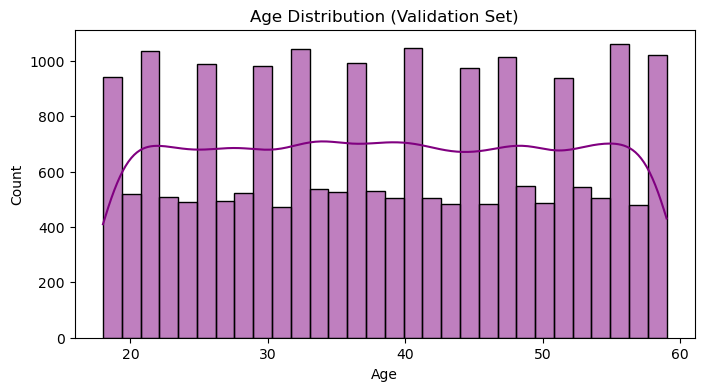


Validation Stats for Years at Company:
count    21191.000000
mean        15.802605
std         11.251908
min          1.000000
25%          7.000000
50%         13.000000
75%         23.000000
max         51.000000
Name: Years at Company, dtype: float64
Skewness: 0.80, Kurtosis: -0.10


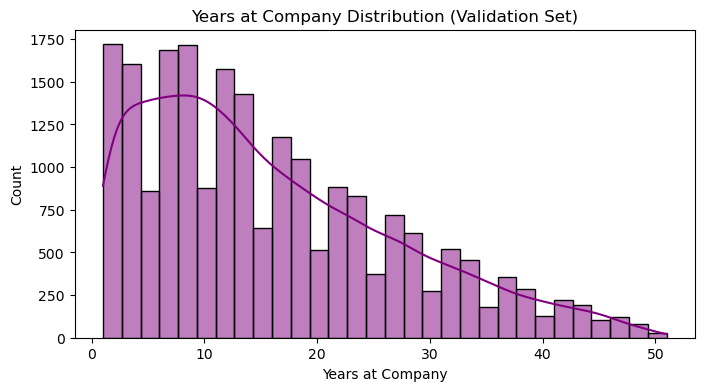


Validation Stats for Monthly Income:
count    21191.000000
mean      7330.230994
std       2477.826554
min       1316.000000
25%       5654.000000
50%       7325.000000
75%       8877.500000
max      50030.000000
Name: Monthly Income, dtype: float64
Skewness: 4.39, Kurtosis: 73.19


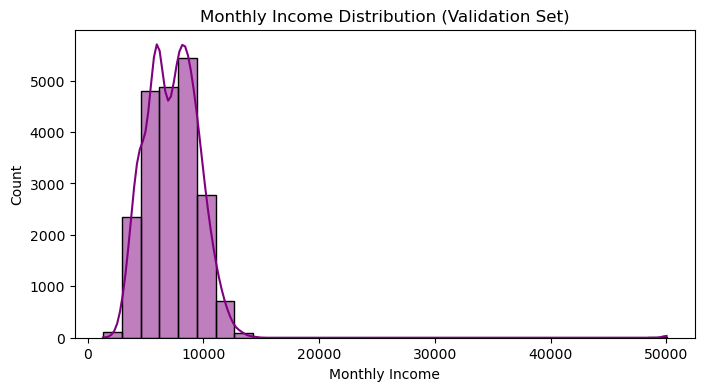


Validation Stats for Number of Promotions:
count    21191.000000
mean         0.823746
std          0.990390
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          4.000000
Name: Number of Promotions, dtype: float64
Skewness: 0.98, Kurtosis: 0.10


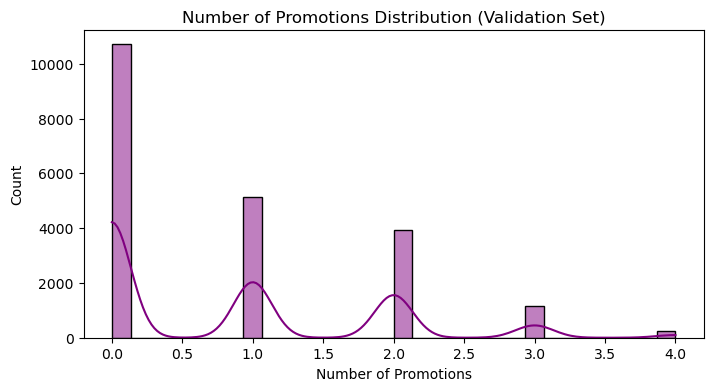


Validation Stats for Distance from Home:
count    21191.000000
mean        50.242650
std         28.566337
min          1.000000
25%         26.000000
50%         50.000000
75%         75.000000
max         99.000000
Name: Distance from Home, dtype: float64
Skewness: -0.00, Kurtosis: -1.20


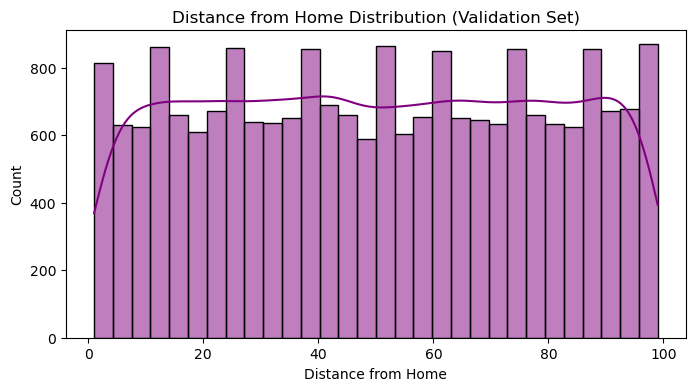


Validation Stats for Number of Dependents:
count    21191.000000
mean         1.651692
std          1.572747
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         15.000000
Name: Number of Dependents, dtype: float64
Skewness: 0.90, Kurtosis: 1.35


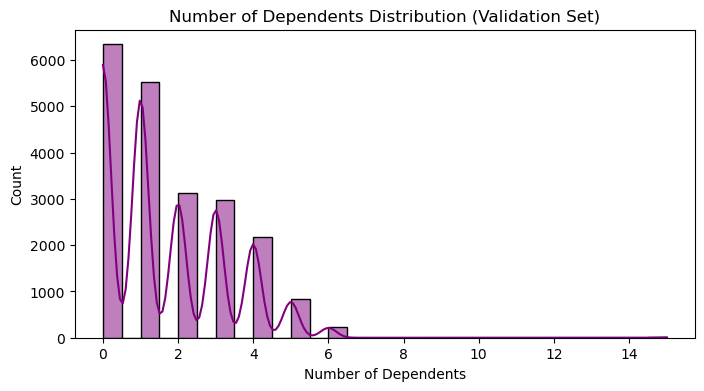


Validation Stats for Company Tenure (In Months):
count    21191.000000
mean        55.710066
std         25.376001
min          2.000000
25%         36.000000
50%         55.000000
75%         76.000000
max        126.000000
Name: Company Tenure (In Months), dtype: float64
Skewness: 0.07, Kurtosis: -0.79


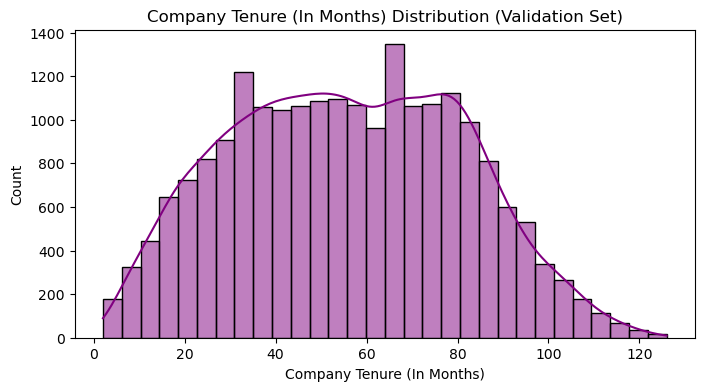

In [67]:
# Plot all the numerical columns to understand their distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Function to summarize and plot numerical validation columns
def summarize_and_plot_val_column(df, column, color='purple'):
    print(f"\nValidation Stats for {column}:")
    print(df[column].describe())

    print(f"Skewness: {df[column].skew():.2f}, Kurtosis: {df[column].kurt():.2f}")

    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30, color=color)
    plt.title(f"{column} Distribution (Validation Set)")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

# Process each numerical column in the validation set
for col in numerical_cols_val:
    summarize_and_plot_val_column(X_val, col)


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.


Correlation Matrix of Numerical Columns in Validation Data are:
                                 Age  Years at Company  Monthly Income  \
Age                         1.000000          0.539387       -0.000566   
Years at Company            0.539387          1.000000       -0.010204   
Monthly Income             -0.000566         -0.010204        1.000000   
Number of Promotions       -0.010176          0.005712        0.002097   
Distance from Home         -0.004707         -0.011369       -0.002003   
Number of Dependents       -0.000856          0.005814        0.005320   
Company Tenure (In Months)  0.235618          0.437715       -0.018976   

                            Number of Promotions  Distance from Home  \
Age                                    -0.010176           -0.004707   
Years at Company                        0.005712           -0.011369   
Monthly Income                          0.002097           -0.002003   
Number of Promotions                    1.000000      

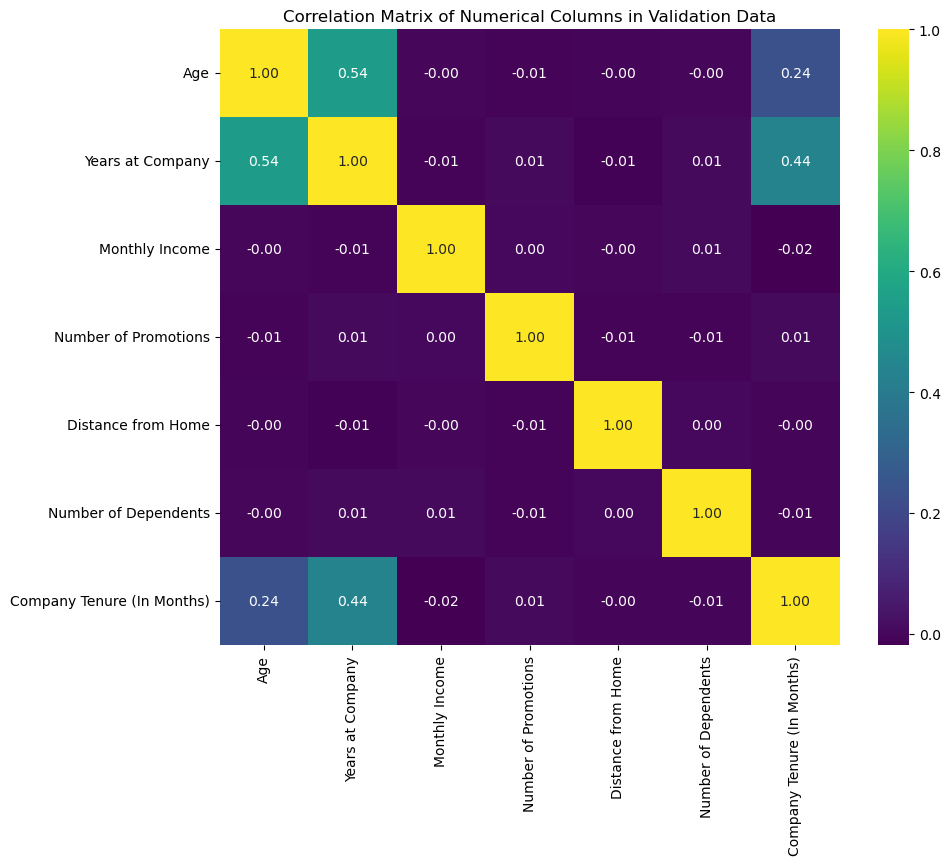

In [70]:
# Create correlation matrix for numerical columns
correlation_matrix_val = X_val[numerical_cols_val].corr()

# Display correlation matrix
print("\nCorrelation Matrix of Numerical Columns in Validation Data are:")
print(correlation_matrix_val)

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_val, annot=True, cmap='viridis', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Numerical Columns in Validation Data")
plt.show()


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.


Class Counts in Validation Set:
Attrition
Left      10166
Stayed    11025
Name: count, dtype: int64

Class Proportions (%) in Validation Set:
Attrition
Left      47.973196
Stayed    52.026804
Name: proportion, dtype: float64


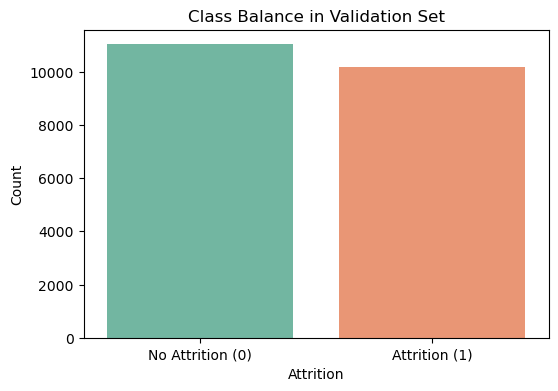

In [73]:
# Plot a bar chart to check class balance
# Calculate class counts
class_counts_val = y_val.value_counts().sort_index()  # Sort by class label (e.g., 0, 1)
class_proportions_val = y_val.value_counts(normalize=True).sort_index() * 100  # Proportions as percentages

# Print class counts and proportions
print("\nClass Counts in Validation Set:")
print(class_counts_val)

print("\nClass Proportions (%) in Validation Set:")
print(class_proportions_val)

# Plot a bar chart to check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_val, palette='Set2')
plt.title("Class Balance in Validation Set")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No Attrition (0)', 'Attrition (1)'])  # Label the classes
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

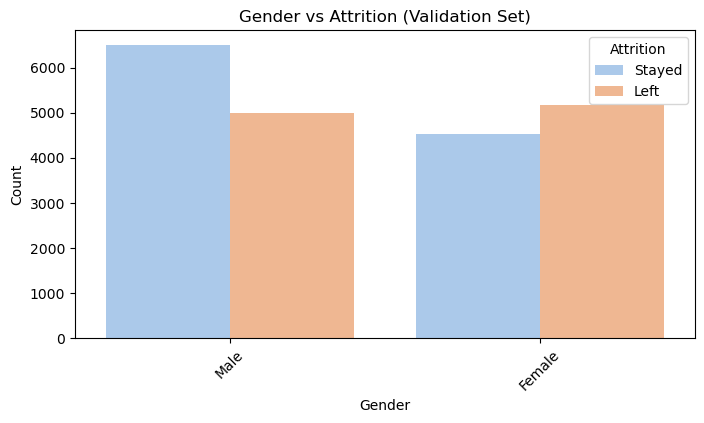

Frequency for Gender:
Gender
Male      11504
Female     9687
Name: count, dtype: int64

Percentage for Gender:
Gender
Male      54.287197
Female    45.712803
Name: count, dtype: float64

Chi-square Test between Gender and Attrition:
Chi2: 205.49, p-value: 0.0000, DoF: 1
Expected Frequencies:
[[4647.16351281 5039.83648719]
 [5518.83648719 5985.16351281]]
--------------------------------------------------


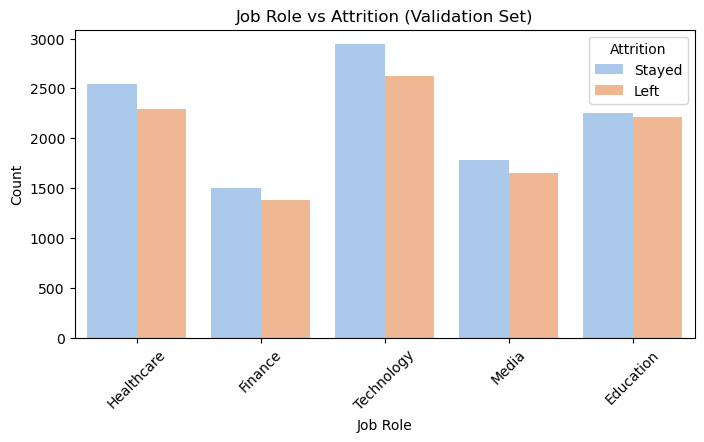

Frequency for Job Role:
Job Role
Technology    5570
Healthcare    4838
Education     4468
Media         3431
Finance       2884
Name: count, dtype: int64

Percentage for Job Role:
Job Role
Technology    26.284744
Healthcare    22.830447
Education     21.084423
Media         16.190836
Finance       13.609551
Name: count, dtype: float64

Chi-square Test between Job Role and Attrition:
Chi2: 7.00, p-value: 0.1357, DoF: 4
Expected Frequencies:
[[2143.44240479 2324.55759521]
 [1383.54697749 1500.45302251]
 [2320.94323062 2517.05676938]
 [1645.96036053 1785.03963947]
 [2672.10702657 2897.89297343]]
--------------------------------------------------


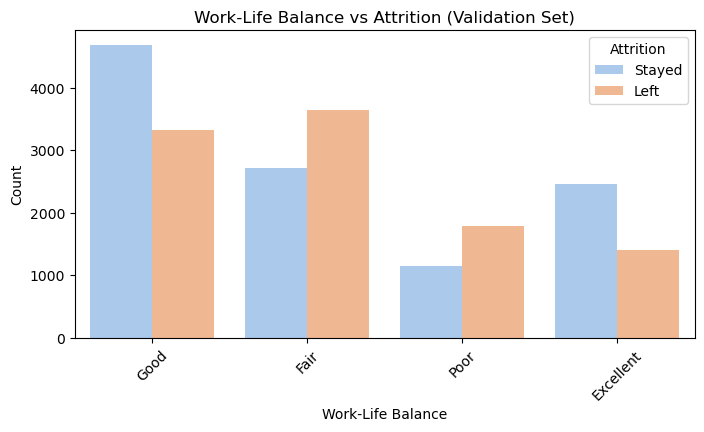

Frequency for Work-Life Balance:
Work-Life Balance
Good         8015
Fair         6361
Excellent    3873
Poor         2942
Name: count, dtype: int64

Percentage for Work-Life Balance:
Work-Life Balance
Good         37.822661
Fair         30.017460
Excellent    18.276627
Poor         13.883252
Name: count, dtype: float64

Chi-square Test between Work-Life Balance and Attrition:
Chi2: 757.18, p-value: 0.0000, DoF: 3
Expected Frequencies:
[[1858.00188759 2014.99811241]
 [3051.57500826 3309.42499174]
 [3845.05167288 4169.94832712]
 [1411.37143127 1530.62856873]]
--------------------------------------------------


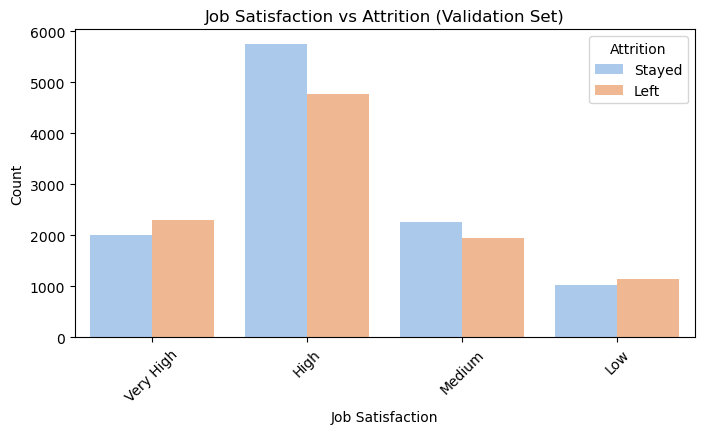

Frequency for Job Satisfaction:
Job Satisfaction
High         10521
Very High     4295
Medium        4212
Low           2163
Name: count, dtype: int64

Percentage for Job Satisfaction:
Job Satisfaction
High         49.648436
Very High    20.268038
Medium       19.876363
Low          10.207163
Name: count, dtype: float64

Chi-square Test between Job Satisfaction and Attrition:
Chi2: 104.30, p-value: 0.0000, DoF: 3
Expected Frequencies:
[[5047.25996885 5473.74003115]
 [1037.66023312 1125.33976688]
 [2020.6310226  2191.3689774 ]
 [2060.44877542 2234.55122458]]
--------------------------------------------------


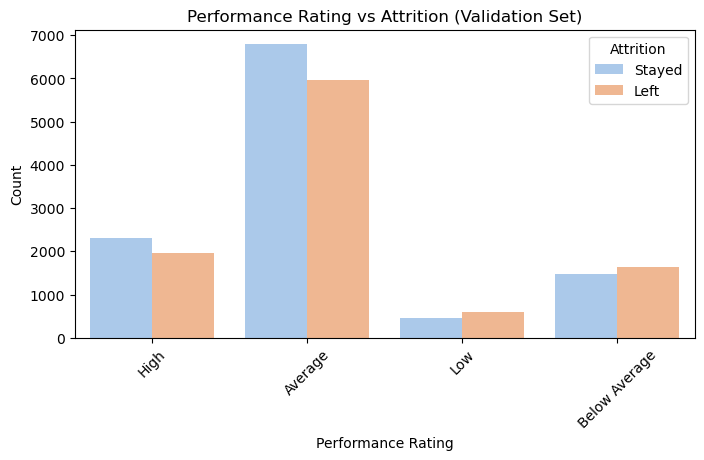

Frequency for Performance Rating:
Performance Rating
Average          12739
High              4289
Below Average     3106
Low               1057
Name: count, dtype: int64

Percentage for Performance Rating:
Performance Rating
Average          60.115143
High             20.239724
Below Average    14.657166
Low               4.987967
Name: count, dtype: float64

Chi-square Test between Performance Rating and Attrition:
Chi2: 78.21, p-value: 0.0000, DoF: 3
Expected Frequencies:
[[6111.30545987 6627.69454013]
 [1490.04747298 1615.95252702]
 [2057.57038365 2231.42961635]
 [ 507.0766835   549.9233165 ]]
--------------------------------------------------


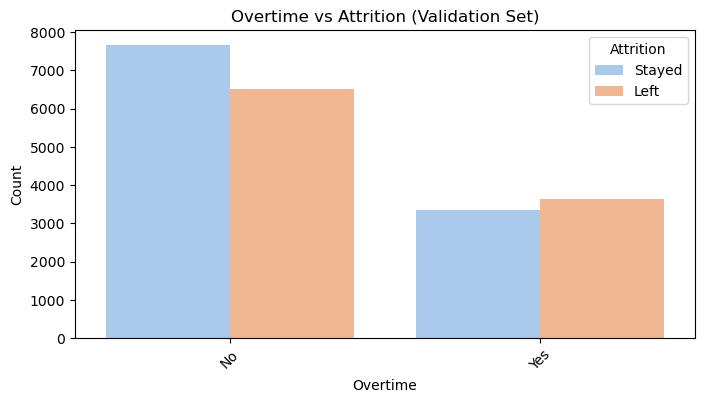

Frequency for Overtime:
Overtime
No     14192
Yes     6999
Name: count, dtype: int64

Percentage for Overtime:
Overtime
No     66.971828
Yes    33.028172
Name: count, dtype: float64

Chi-square Test between Overtime and Attrition:
Chi2: 68.39, p-value: 0.0000, DoF: 1
Expected Frequencies:
[[6808.35600019 7383.64399981]
 [3357.64399981 3641.35600019]]
--------------------------------------------------


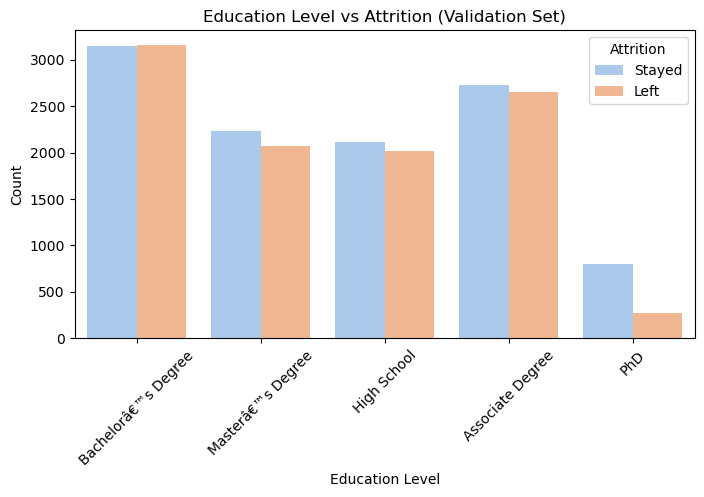

Frequency for Education Level:
Education Level
Bachelorâ€™s Degree    6314
Associate Degree       5387
Masterâ€™s Degree      4294
High School            4131
PhD                    1065
Name: count, dtype: int64

Percentage for Education Level:
Education Level
Bachelorâ€™s Degree    29.795668
Associate Degree       25.421169
Masterâ€™s Degree      20.263319
High School            19.494125
PhD                     5.025718
Name: count, dtype: float64

Chi-square Test between Education Level and Attrition:
Chi2: 241.64, p-value: 0.0000, DoF: 4
Expected Frequencies:
[[2584.31607758 2802.68392242]
 [3029.02760606 3284.97239394]
 [1981.77273371 2149.22726629]
 [2059.96904346 2234.03095654]
 [ 510.91453919  554.08546081]]
--------------------------------------------------


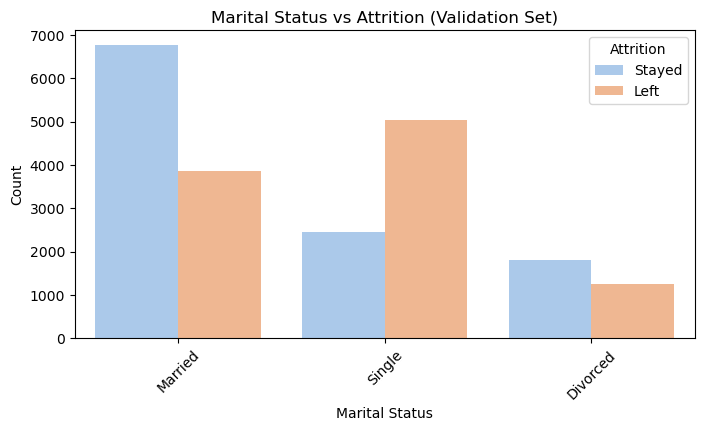

Frequency for Marital Status:
Marital Status
Married     10646
Single       7499
Divorced     3046
Name: count, dtype: int64

Percentage for Marital Status:
Marital Status
Married     50.238309
Single      35.387665
Divorced    14.374027
Name: count, dtype: float64

Chi-square Test between Marital Status and Attrition:
Chi2: 1759.02, p-value: 0.0000, DoF: 2
Expected Frequencies:
[[1461.26355528 1584.73644472]
 [5107.22646406 5538.77353594]
 [3597.50998065 3901.49001935]]
--------------------------------------------------


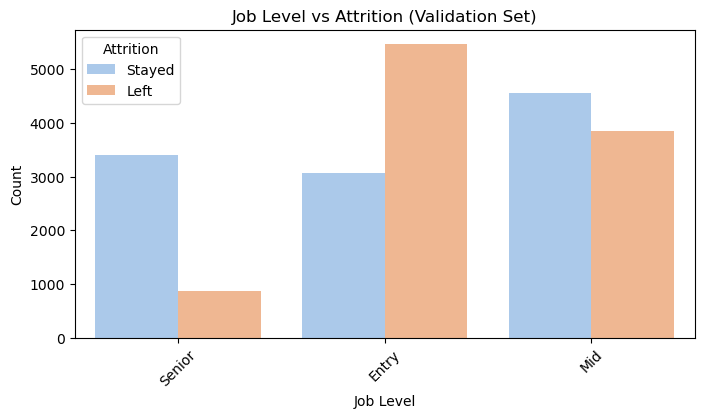

Frequency for Job Level:
Job Level
Entry     8531
Mid       8392
Senior    4268
Name: count, dtype: int64

Percentage for Job Level:
Job Level
Entry     40.257657
Mid       39.601718
Senior    20.140626
Name: count, dtype: float64

Chi-square Test between Job Level and Attrition:
Chi2: 2219.12, p-value: 0.0000, DoF: 2
Expected Frequencies:
[[4092.59336511 4438.40663489]
 [4025.91062243 4366.08937757]
 [2047.49601246 2220.50398754]]
--------------------------------------------------


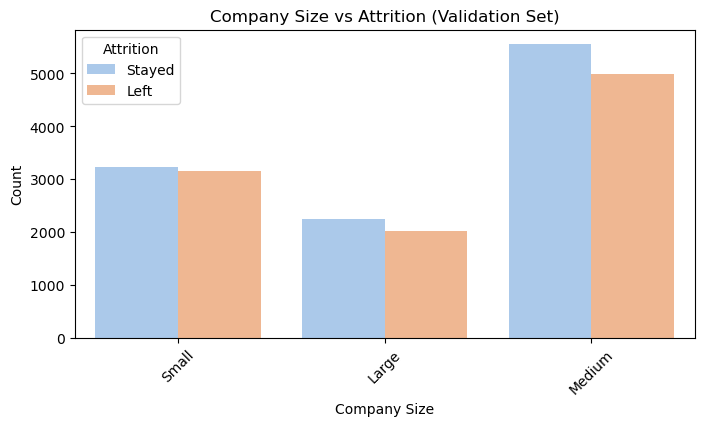

Frequency for Company Size:
Company Size
Medium    10551
Small      6368
Large      4272
Name: count, dtype: int64

Percentage for Company Size:
Company Size
Medium    49.790005
Small     30.050493
Large     20.159502
Name: count, dtype: float64

Chi-square Test between Company Size and Attrition:
Chi2: 7.80, p-value: 0.0202, DoF: 2
Expected Frequencies:
[[2049.4149403  2222.5850597 ]
 [5061.65192771 5489.34807229]
 [3054.93313199 3313.06686801]]
--------------------------------------------------


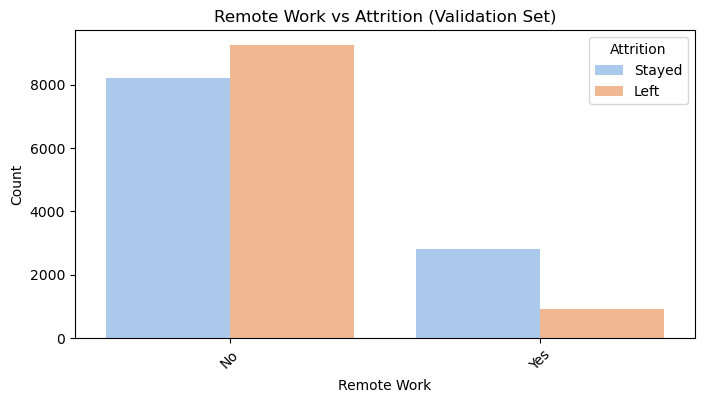

Frequency for Remote Work:
Remote Work
No     17461
Yes     3730
Name: count, dtype: int64

Percentage for Remote Work:
Remote Work
No     82.398188
Yes    17.601812
Name: count, dtype: float64

Chi-square Test between Remote Work and Attrition:
Chi2: 1013.88, p-value: 0.0000, DoF: 1
Expected Frequencies:
[[8376.59978293 9084.40021707]
 [1789.40021707 1940.59978293]]
--------------------------------------------------


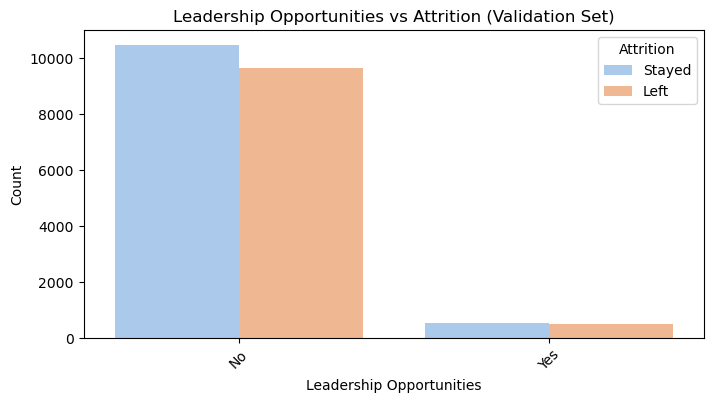

Frequency for Leadership Opportunities:
Leadership Opportunities
No     20145
Yes     1046
Name: count, dtype: int64

Percentage for Leadership Opportunities:
Leadership Opportunities
No     95.063942
Yes     4.936058
Name: count, dtype: float64

Chi-square Test between Leadership Opportunities and Attrition:
Chi2: 0.01, p-value: 0.9343, DoF: 1
Expected Frequencies:
[[ 9664.20036808 10480.79963192]
 [  501.79963192   544.20036808]]
--------------------------------------------------


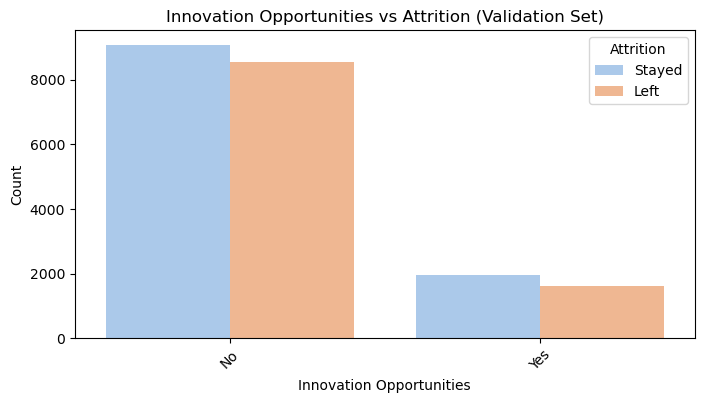

Frequency for Innovation Opportunities:
Innovation Opportunities
No     17635
Yes     3556
Name: count, dtype: int64

Percentage for Innovation Opportunities:
Innovation Opportunities
No     83.219291
Yes    16.780709
Name: count, dtype: float64

Chi-square Test between Innovation Opportunities and Attrition:
Chi2: 12.85, p-value: 0.0003, DoF: 1
Expected Frequencies:
[[8460.07314426 9174.92685574]
 [1705.92685574 1850.07314426]]
--------------------------------------------------


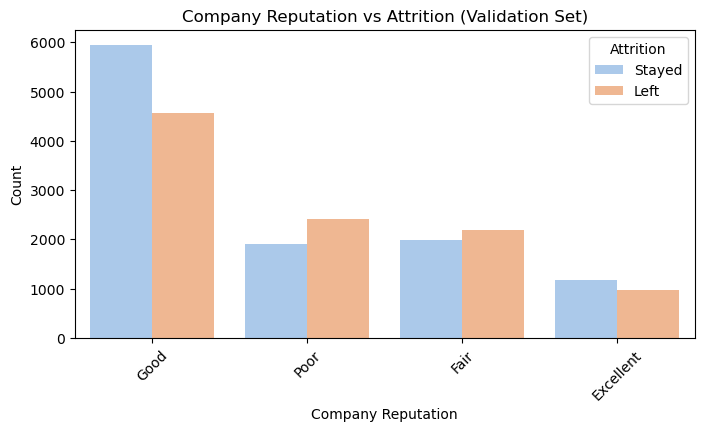

Frequency for Company Reputation:
Company Reputation
Good         10522
Poor          4328
Fair          4182
Excellent     2159
Name: count, dtype: int64

Percentage for Company Reputation:
Company Reputation
Good         49.653155
Poor         20.423765
Fair         19.734793
Excellent    10.188287
Name: count, dtype: float64

Chi-square Test between Company Reputation and Attrition:
Chi2: 245.10, p-value: 0.0000, DoF: 3
Expected Frequencies:
[[1035.74130527 1123.25869473]
 [2006.23906375 2175.76093625]
 [5047.73970082 5474.26029918]
 [2076.27993016 2251.72006984]]
--------------------------------------------------


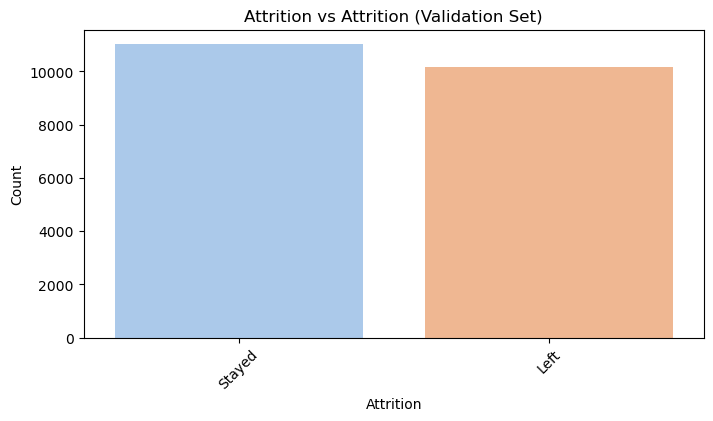

Frequency for Attrition:
Attrition
Stayed    11025
Left      10166
Name: count, dtype: int64

Percentage for Attrition:
Attrition
Stayed    52.026804
Left      47.973196
Name: count, dtype: float64

Chi-square Test between Attrition and Attrition:
Chi2: 21186.99, p-value: 0.0000, DoF: 1
Expected Frequencies:
[[4876.95512246 5289.04487754]
 [5289.04487754 5735.95512246]]
--------------------------------------------------


In [76]:
# Plot distribution for each categorical column with target variable
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to analyze a single categorical column in validation data
def analyze_categorical_column(df, target_col, feature_col, palette='Set2'):
    # Plot count distribution
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature_col, hue=target_col, palette=palette)
    plt.title(f"{feature_col} vs {target_col} (Validation Set)")
    plt.xlabel(feature_col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    # Frequency and percentage distribution
    freq = df[feature_col].value_counts()
    perc = freq / freq.sum() * 100
    print(f"Frequency for {feature_col}:\n{freq}\n")
    print(f"Percentage for {feature_col}:\n{perc}\n")

    # Chi-square test
    contingency = pd.crosstab(df[feature_col], df[target_col])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square Test between {feature_col} and {target_col}:")
    print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}, DoF: {dof}")
    print(f"Expected Frequencies:\n{expected}")
    print("-" * 50)

# Combine features and target
val_data = X_val.copy()
val_data['Attrition'] = y_val

# Get list of categorical columns
categorical_cols_val = val_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Analyze each categorical column
for col in categorical_cols_val:
    analyze_categorical_column(val_data, 'Attrition', col, palette='pastel')  # Change palette if needed



## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [80]:
# Check the categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns in Training Set:", categorical_cols)


Categorical Columns in Training Set: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [82]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

# Add the results to the master DataFrame
print("Training Set After Dummy Variable Creation:")
X_train_dummies

Training Set After Dummy Variable Creation:


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor
41465,46,26,4617,2,59.0,2,92.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
69350,43,26,4447,3,64.0,0,103.0,True,False,False,...,False,False,False,True,False,False,True,False,False,True
28247,27,8,9762,0,84.0,1,16.0,True,True,False,...,True,False,True,False,False,False,True,False,True,False
3217,47,29,5244,2,59.0,1,74.0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
73636,25,10,4455,0,36.0,0,62.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39742,57,26,5620,0,41.0,3,78.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
7084,34,21,10901,0,57.0,1,23.0,True,True,False,...,False,False,False,False,False,False,False,False,True,False
58283,40,25,6338,0,90.0,0,68.0,False,False,True,...,False,False,True,False,True,False,False,True,False,False
1679,47,38,5165,0,70.0,0,65.0,True,False,False,...,False,False,False,True,False,False,True,False,True,False


Now, drop the original categorical columns and check the DataFrame

In [84]:
# Drop the original categorical columns and check the DataFrame
# Check the new DataFrame with dummy variables
print("Validation Set After Dummy Variable Creation:")
X_train_dummies.head()

Validation Set After Dummy Variable Creation:


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor
41465,46,26,4617,2,59.0,2,92.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
69350,43,26,4447,3,64.0,0,103.0,True,False,False,...,False,False,False,True,False,False,True,False,False,True
28247,27,8,9762,0,84.0,1,16.0,True,True,False,...,True,False,True,False,False,False,True,False,True,False
3217,47,29,5244,2,59.0,1,74.0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
73636,25,10,4455,0,36.0,0,62.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [86]:
# Create dummy variables using the 'get_dummies' for independent columns
X_val_dummies = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

# Add the results to the master DataFrame
X_val_dummies = X_val_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)




Now, drop the original categorical columns and check the DataFrame

In [88]:
# Drop categorical columns and check the DataFrame
# Check the new DataFrame with dummy variables
print("Validation Set After Dummy Variable Creation:")
X_val_dummies.head()

Validation Set After Dummy Variable Creation:


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor
23813,46,1,7740,3,78.0,2,3.0,True,False,True,...,False,True,False,True,False,False,False,False,True,False
14537,32,6,8779,1,91.0,0,35.0,True,True,False,...,False,False,False,False,True,False,False,False,False,True
45192,53,10,11683,1,71.0,1,39.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
13765,50,2,7305,2,71.0,1,3.0,False,False,False,...,False,False,True,False,False,False,True,True,False,False
3411,48,24,10114,0,2.0,1,64.0,True,False,True,...,False,True,True,False,False,False,False,False,False,False


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [90]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = pd.DataFrame(y_train, columns=['Attrition'])
y_val_df = pd.DataFrame(y_val, columns=['Attrition'])

# Check the DataFrames
print("Training Target DataFrame:")
print(y_train_df.head())

print("\nValidation Target DataFrame:")
print(y_val_df.head())

Training Target DataFrame:
      Attrition
41465      Left
69350      Left
28247      Left
3217       Left
73636      Left

Validation Target DataFrame:
      Attrition
23813    Stayed
14537      Left
45192      Left
13765      Left
3411     Stayed


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [92]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dummies = pd.get_dummies(y_train_df, columns=['Attrition'], drop_first=True)

# Rename the resulting column for clarity
y_train_dummies.columns = ['Attrition_Yes']

# Check the new DataFrame with dummy variables
print("Training Target After Dummy Variable Creation:")
y_train_dummies.head()

Training Target After Dummy Variable Creation:


,Attrition_Yes
41465,False
69350,False
28247,False
3217,False
73636,False


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [94]:
# Create dummy variables using the 'get_dummies' for dependent column
y_val_dummies = pd.get_dummies(y_val_df, columns=['Attrition'], drop_first=True)

# Rename the resulting column for clarity
y_val_dummies.columns = ['Attrition_Yes']

# Check the new DataFrame with dummy variables
print("Validation Target After Dummy Variable Creation:")
y_val_dummies.head()

Validation Target After Dummy Variable Creation:


,Attrition_Yes
23813,True
14537,False
45192,False
13765,False
3411,True


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [96]:
# Drop redundant columns from both train and validation
print("Training Set Final Shape:", X_train_dummies.shape)

print("Validation Set Final Shape:", X_val_dummies.shape)

Training Set Final Shape: (49444, 38)
Validation Set Final Shape: (21191, 38)


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [99]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [101]:
from sklearn.preprocessing import StandardScaler

#Scale the numeric features present in the training set
def scale_numerical_features(train_df, val_df, num_cols):
    scaler = StandardScaler()

    # Scale training data
    train_scaled = train_df.copy()
    train_scaled[num_cols] = scaler.fit_transform(train_df[num_cols])

#Scale the numerical features present in the validation set
    val_scaled = val_df.copy()
    val_scaled[num_cols] = scaler.transform(val_df[num_cols])

    return train_scaled, val_scaled

# Identify numerical columns
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns in training data:", num_cols)

# Scale the data
X_train_scaled, X_val_scaled = scale_numerical_features(X_train_dummies, X_val_dummies, num_cols)

# Display scaled results
print("Scaled Training Data (first 5 rows):")
print(X_train_scaled.head())

print("Scaled Validation Data (first 5 rows):")
print(X_val_scaled.head())



Numerical columns in training data: ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure (In Months)']
Scaled Training Data (first 5 rows):
            Age  Years at Company  Monthly Income  Number of Promotions  \
41465  0.619633          0.919879       -1.064176              1.169006   
69350  0.371227          0.919879       -1.130434              2.172605   
28247 -0.953603         -0.685603        0.941122             -0.838194   
3217   0.702434          1.187460       -0.819798              1.169006   
73636 -1.119207         -0.507216       -1.127316             -0.838194   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
41465            0.319585              0.218921                    1.427790   
69350            0.494961             -1.050275                    1.860823   
28247            1.196466             -0.415677                   -1.564070   
3217          

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [105]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [107]:
# Import RFE and select 15 variables

# Import RFE
from sklearn.feature_selection import RFE
# Create a Logistic Regression object
logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Initialize RFE with 15 features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE on the scaled training data
rfe.fit(X_train_scaled, y_train_dummies['Attrition_Yes'])

# Display the features selected by RFE
selected_features = X_train_scaled.columns[rfe.support_]



In [108]:
# Display the features selected by RFE
print("Features Selected by RFE:")
print(selected_features)

Features Selected by RFE:
Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [110]:
# Put columns selected by RFE into variable 'col'
# Create new DataFrames with only the selected features
X_train_rfe = X_train_scaled[selected_features]
X_val_rfe = X_val_scaled[selected_features]

# Verify the shapes of the new DataFrames
print("Training Set Shape After RFE:", X_train_rfe.shape)
print("Validation Set Shape After RFE:", X_val_rfe.shape)


Training Set Shape After RFE: (49444, 15)
Validation Set Shape After RFE: (21191, 15)


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [113]:
# Select only the columns selected by RFE
X_train_rfe = X_train_scaled[selected_features]

In [114]:
# View the training data
print("Training Data After RFE:")
X_train_rfe.head()

Training Data After RFE:


,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
41465,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False
69350,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
28247,True,False,False,False,True,True,False,True,False,True,True,False,False,False,False
3217,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False
73636,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [116]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

# Add a constant to the training set
X_train_rfe_const = sm.add_constant(X_train_rfe)

# View the training data with the constant
print("Training Data with Constant:")
X_train_rfe_const.head()


Training Data with Constant:


,const,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
41465,1.0,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False
69350,1.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
28247,1.0,True,False,False,False,True,True,False,True,False,True,True,False,False,False,False
3217,1.0,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False
73636,1.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [118]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
# Convert all bool columns in X_train_rfe_const to int64
X_train_rfe_const = X_train_rfe_const.astype(int)

# Convert the target variable y_train_dummies['Attrition_Yes'] to int64
y_train_dummies['Attrition_Yes'] = y_train_dummies['Attrition_Yes'].astype(int)

# # Verify the data types after conversion
# print("Data Types After Conversion:")
# print(X_train_rfe_const.dtypes)
# print("\nTarget Variable Data Type After Conversion:")
# print(y_train_dummies['Attrition_Yes'].dtype)

# Fit the logistic regression model
logit_model = sm.Logit(y_train_dummies['Attrition_Yes'], X_train_rfe_const)

# Fit the model and print the summary
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.506106
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Attrition_Yes   No. Observations:                49444
Model:                          Logit   Df Residuals:                    49428
Method:                           MLE   Df Model:                           15
Date:                Sun, 25 May 2025   Pseudo R-squ.:                  0.2689
Time:                        22:49:04   Log-Likelihood:                -25024.
converged:                       True   LL-Null:                       -34226.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2601      0.028      9.20

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [121]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
# Make a VIF DataFrame for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude the intercept column before calculating VIF
features_only = X_train_rfe_const.loc[:, X_train_rfe_const.columns != 'const']

# Compute VIF for each feature
vif_df = pd.DataFrame({
    'Feature': features_only.columns,
    'VIF': [variance_inflation_factor(features_only.values, i) for i in range(features_only.shape[1])]
})

# Output the VIF results
print("Variance Inflation Factors:")
display(vif_df)


Variance Inflation Factors:


,Feature,VIF
0,Gender_Male,1.850083
1,Work-Life Balance_Fair,1.406546
2,Work-Life Balance_Poor,1.185472
3,Job Satisfaction_Low,1.114918
4,Job Satisfaction_Very High,1.231710
5,Performance Rating_Below Average,1.155266
6,Performance Rating_Low,1.052072
7,Overtime_Yes,1.384875
8,Education Level_PhD,1.045687
9,Marital Status_Single,1.419901


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [125]:
# Predict the probabilities on the training set
y_train_pred_prob = result.predict(X_train_rfe_const)

# View the first few predicted probabilities
print("Predicted Probabilities on Training Set:")
y_train_pred_prob.head()


Predicted Probabilities on Training Set:


41465    0.041969
69350    0.165156
28247    0.262070
3217     0.785798
73636    0.192069
dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [127]:
# Reshape it into an array
y_train_pred_prob_array = y_train_pred_prob.values.reshape(-1, 1)

# View the reshaped array
print("Reshaped Predicted Probabilities:")
y_train_pred_prob_array[:5]


Reshaped Predicted Probabilities:


array([[0.04196947],
       [0.16515553],
       [0.26206987],
       [0.78579766],
       [0.19206875]])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [129]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
train_results = pd.concat([
    y_train_dummies['Attrition_Yes'].rename('Actual'),
    pd.Series(y_train_pred_prob, name='Predicted_Probability')
], axis=1)

# Display a preview of the results
print("Preview of Training Predictions:")
display(train_results.head())


Preview of Training Predictions:


,Actual,Predicted_Probability
41465,0,0.041969
69350,0,0.165156
28247,0,0.262070
3217,0,0.785798
73636,0,0.192069


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [131]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
train_results['Predicted'] = (train_results['Predicted_Probability'] > 0.5).astype(int)

# View the updated DataFrame
print("Training Results with Predicted Column:")
train_results.head()

Training Results with Predicted Column:


,Actual,Predicted_Probability,Predicted
41465,0,0.041969,0
69350,0,0.165156,0
28247,0,0.262070,0
3217,0,0.785798,1
73636,0,0.192069,0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [134]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(train_results['Actual'], train_results['Predicted'])
print(f"Accuracy of the Model: {accuracy:.4f}")


Accuracy of the Model: 0.7392


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [136]:
# Create confusion matrix
conf_matrix = metrics.confusion_matrix(train_results['Actual'], train_results['Predicted'])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[17082  6577]
 [ 6320 19465]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [138]:
# Create variables for true positive, true negative, false positive and false negative
# Unpack confusion matrix values
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Display the values
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")


True Negative (TN): 17082
False Positive (FP): 6577
False Negative (FN): 6320
True Positive (TP): 19465


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [140]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)
print(f"Sensitivity (Recall): {sensitivity:.4f}")

Sensitivity (Recall): 0.7549


In [141]:
# Calculate specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.7220


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [143]:
# Calculate precision
precision = TP / (TP + FP)
print(f"Precision: {precision:.4f}")

Precision: 0.7474


In [144]:
# Calculate recall
recall = sensitivity
print(f"Recall: {recall:.4f}")

Recall: 0.7549


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [147]:
# Define ROC function
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def display_roc_analysis(y_true, y_scores):
    # Generate False Positive Rate, True Positive Rate, and Thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc_score = auc(fpr, tpr)

    # Display AUC
    print(f"\nROC AUC Score: {auc_score:.4f}")

    # Sample a few threshold points
    print("\nSelected ROC Threshold Points:")
    print(f"{'Threshold':>10} | {'Sensitivity (TPR)':>20} | {'1 - Specificity (FPR)':>25}")
    print("-" * 60)
    for idx in np.linspace(0, len(thresholds) - 1, 8, dtype=int):
        print(f"{thresholds[idx]:>10.4f} | {tpr[idx]:>20.4f} | {fpr[idx]:>25.4f}")

    # Identify optimal threshold using Youden’s J statistic
    j_scores = tpr - fpr
    best_idx = j_scores.argmax()
    optimal_threshold = thresholds[best_idx]
    print(f"\nOptimal Threshold (Youden’s J): {optimal_threshold:.4f}")
    print(f"TPR: {tpr[best_idx]:.4f}, FPR: {fpr[best_idx]:.4f}, J: {j_scores[best_idx]:.4f}")

    # Plot ROC Curve
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})', color='darkorange', linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



ROC AUC Score: 0.8261

Selected ROC Threshold Points:
 Threshold |    Sensitivity (TPR) |     1 - Specificity (FPR)
------------------------------------------------------------
       inf |               0.0000 |                    0.0000
    0.8984 |               0.2209 |                    0.0079
    0.7632 |               0.4522 |                    0.0679
    0.6107 |               0.6389 |                    0.1703
    0.4319 |               0.8173 |                    0.3556
    0.2687 |               0.9276 |                    0.5667
    0.1281 |               0.9889 |                    0.7934
    0.0096 |               1.0000 |                    1.0000

Optimal Threshold (Youden’s J): 0.5513
TPR: 0.7068, FPR: 0.2272, J: 0.4795


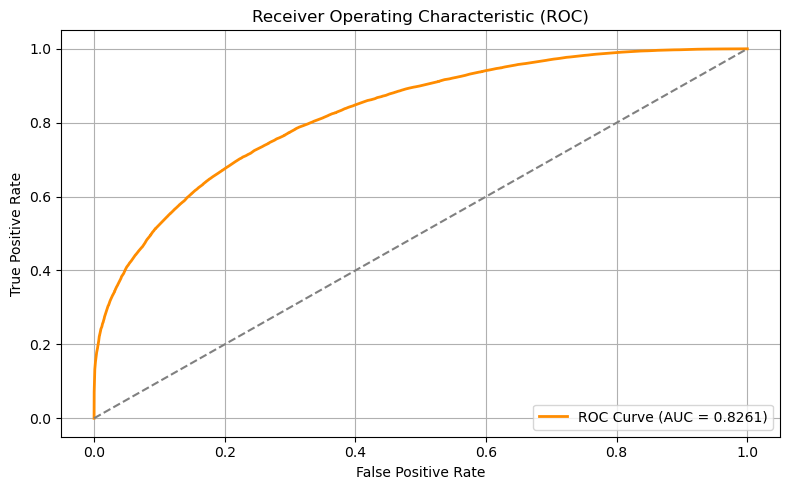

In [148]:
# Call the ROC function
display_roc_analysis(train_results['Actual'], train_results['Predicted_Probability'])


**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [151]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    train_results[f'Predicted_{threshold}'] = (train_results['Predicted_Probability'] > threshold).astype(int)

# View the first few rows of the updated DataFrame
print("Training Results with Predictions at Different Thresholds:")
train_results.head()

Training Results with Predictions at Different Thresholds:


,Actual,Predicted_Probability,Predicted,Predicted_0.1,Predicted_0.2,Predicted_0.3,Predicted_0.4,Predicted_0.5,Predicted_0.6,Predicted_0.7,Predicted_0.8,Predicted_0.9
41465,0,0.041969,0,0,0,0,0,0,0,0,0,0
69350,0,0.165156,0,1,0,0,0,0,0,0,0,0
28247,0,0.262070,0,1,1,0,0,0,0,0,0,0
3217,0,0.785798,1,1,1,1,1,1,1,1,0,0
73636,0,0.192069,0,1,0,0,0,0,0,0,0,0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [153]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
metrics_df = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity'])

for threshold in thresholds:
    predicted_col = f'Predicted_{threshold}'
    conf_matrix = metrics.confusion_matrix(train_results['Actual'], train_results[predicted_col])

    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Use pd.concat instead of append
    new_row = pd.DataFrame({
        'Threshold': [threshold],
        'Accuracy': [accuracy],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity]
    })
    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Display the metrics DataFrame
print("Metrics at Different Thresholds:")
metrics_df

Metrics at Different Thresholds:


,Threshold,Accuracy,Sensitivity,Specificity
0,0.1,0.590628,0.994687,0.150260
1,0.2,0.658260,0.964165,0.324866
2,0.3,0.704534,0.906535,0.484382
3,0.4,0.731312,0.840838,0.611945
4,0.5,0.739159,0.754896,0.722009
5,0.6,0.731211,0.645065,0.825098
6,0.7,0.704676,0.526779,0.898559
7,0.8,0.659069,0.385612,0.957099
8,0.9,0.588828,0.218732,0.992181



Threshold-wise Metric Summary:
 Threshold |  Accuracy | Recall (Sensitivity) |  Specificity
------------------------------------------------------------
    0.1000 |    0.5906 |               0.9947 |       0.1503
    0.2000 |    0.6583 |               0.9642 |       0.3249
    0.3000 |    0.7045 |               0.9065 |       0.4844
    0.4000 |    0.7313 |               0.8408 |       0.6119
    0.5000 |    0.7392 |               0.7549 |       0.7220
    0.6000 |    0.7312 |               0.6451 |       0.8251
    0.7000 |    0.7047 |               0.5268 |       0.8986
    0.8000 |    0.6591 |               0.3856 |       0.9571
    0.9000 |    0.5888 |               0.2187 |       0.9922

Optimal Thresholds for Each Metric:
Best Accuracy     -> 0.7392 @ Threshold = 0.5000
Best Sensitivity  -> 0.9947 @ Threshold = 0.1000
Best Specificity  -> 0.9922 @ Threshold = 0.9000


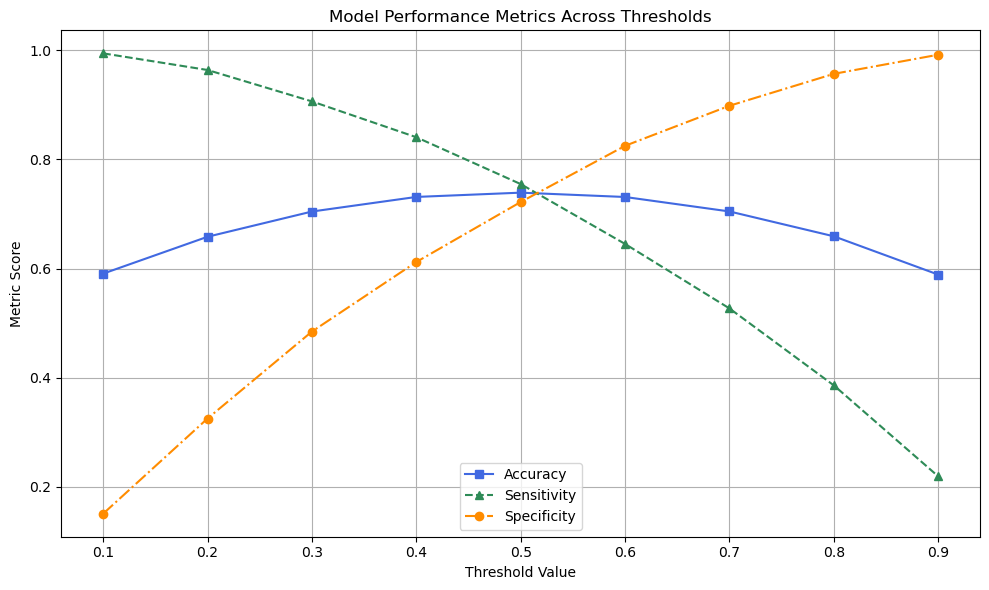

In [154]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
import matplotlib.pyplot as plt

def summarize_threshold_metrics(metrics_df):
    print("\nThreshold-wise Metric Summary:")
    print(f"{'Threshold':>10} | {'Accuracy':>9} | {'Recall (Sensitivity)':>20} | {'Specificity':>12}")
    print("-" * 60)

    # Display approximately 10 representative rows
    sampled_rows = metrics_df.iloc[::max(1, len(metrics_df) // 10)]
    for _, row in sampled_rows.iterrows():
        print(f"{row['Threshold']:>10.4f} | {row['Accuracy']:>9.4f} | {row['Sensitivity']:>20.4f} | {row['Specificity']:>12.4f}")

    # Report optimal thresholds for each metric
    top_accuracy = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
    top_sensitivity = metrics_df.loc[metrics_df['Sensitivity'].idxmax()]
    top_specificity = metrics_df.loc[metrics_df['Specificity'].idxmax()]

    print("\nOptimal Thresholds for Each Metric:")
    print(f"Best Accuracy     -> {top_accuracy['Accuracy']:.4f} @ Threshold = {top_accuracy['Threshold']:.4f}")
    print(f"Best Sensitivity  -> {top_sensitivity['Sensitivity']:.4f} @ Threshold = {top_sensitivity['Threshold']:.4f}")
    print(f"Best Specificity  -> {top_specificity['Specificity']:.4f} @ Threshold = {top_specificity['Threshold']:.4f}")

# Display metrics table
summarize_threshold_metrics(metrics_df)

# Plot the metric curves
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy', linestyle='-', color='royalblue', marker='s')
plt.plot(metrics_df['Threshold'], metrics_df['Sensitivity'], label='Sensitivity', linestyle='--', color='seagreen', marker='^')
plt.plot(metrics_df['Threshold'], metrics_df['Specificity'], label='Specificity', linestyle='-.', color='darkorange', marker='o')

plt.title('Model Performance Metrics Across Thresholds')
plt.xlabel('Threshold Value')
plt.ylabel('Metric Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [156]:
# Create a column for final prediction based on the optimal cutoff
metrics_df['Geometric_Mean'] = (metrics_df['Sensitivity'] * metrics_df['Specificity']) ** 0.5
optimal_threshold = metrics_df.loc[metrics_df['Geometric_Mean'].idxmax()]['Threshold']
print(f"Optimal Threshold Based on Geometric Mean: {optimal_threshold}")

# Create a column for final prediction based on the optimal cutoff
train_results['Final_Prediction'] = (train_results['Predicted_Probability'] > optimal_threshold).astype(int)

# View the first few rows of the updated DataFrame
print("Final Predictions Based on Optimal Threshold:")
train_results[['Actual', 'Predicted_Probability', 'Final_Prediction']].head()


Optimal Threshold Based on Geometric Mean: 0.5
Final Predictions Based on Optimal Threshold:


,Actual,Predicted_Probability,Final_Prediction
41465,0,0.041969,0
69350,0,0.165156,0
28247,0,0.262070,0
3217,0,0.785798,1
73636,0,0.192069,0


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [158]:
# Calculate the accuracy
final_accuracy = metrics.accuracy_score(train_results['Actual'], train_results['Final_Prediction'])
print(f"Accuracy of the Model with Optimal Threshold: {final_accuracy:.4f}")


Accuracy of the Model with Optimal Threshold: 0.7392


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [160]:
# Create the confusion matrix once again
final_conf_matrix = metrics.confusion_matrix(train_results['Actual'], train_results['Final_Prediction'])

# Display the confusion matrix
print("Confusion Matrix with Optimal Threshold:")
print(final_conf_matrix)

Confusion Matrix with Optimal Threshold:
[[17082  6577]
 [ 6320 19465]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [162]:
# Create variables for true positive, true negative, false positive and false negative
TN = final_conf_matrix[0, 0]
FP = final_conf_matrix[0, 1]
FN = final_conf_matrix[1, 0]
TP = final_conf_matrix[1, 1]

# Display the values
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

True Negative (TN): 17082
False Positive (FP): 6577
False Negative (FN): 6320
True Positive (TP): 19465


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [164]:
# Calculate Sensitivity
final_sensitivity = TP / (TP + FN)
print(f"Sensitivity (Recall): {final_sensitivity:.4f}")

Sensitivity (Recall): 0.7549


In [165]:
# Calculate Specificity
final_specificity = TN / (TN + FP)
print(f"Specificity: {final_specificity:.4f}")

Specificity: 0.7220


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [167]:
# Calculate Precision
final_precision = TP / (TP + FP)
print(f"Precision: {final_precision:.4f}")

Precision: 0.7474


In [168]:
# Calculate Recall
final_recall = final_sensitivity
print(f"Recall: {final_recall:.4f}")


Recall: 0.7549


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [170]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [171]:
# Check actual and predicted values from initial model
precision, recall, thresholds_pr = precision_recall_curve(train_results['Actual'], train_results['Predicted_Probability'])


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

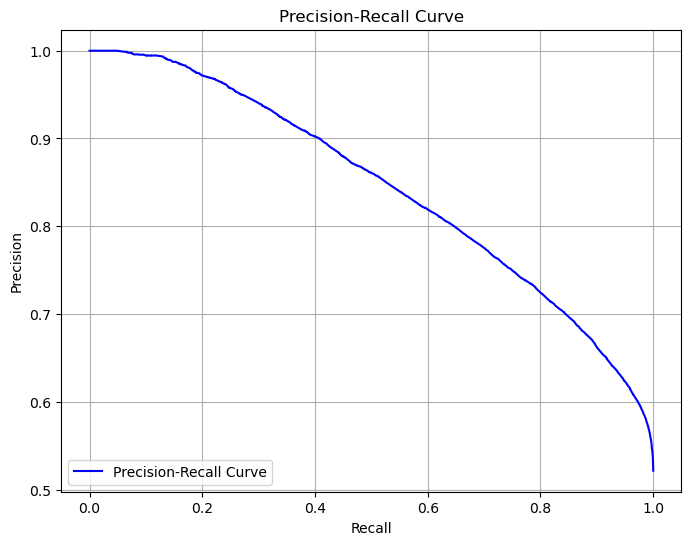


Sample Precision-Recall Points:
  Recall |  Precision
-----------------------
  1.0000 |     0.5215
  0.9952 |     0.5587
  0.9611 |     0.6119
  0.8914 |     0.6705
  0.7844 |     0.7341
  0.6422 |     0.8022
  0.4882 |     0.8648
  0.3374 |     0.9247
  0.1520 |     0.9874
  0.0000 |     1.0000

Best F1 Score: 0.7665
At this point -> Precision: 0.6913, Recall: 0.8600


In [173]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()


# Print sample precision-recall points
print("\nSample Precision-Recall Points:")
print(f"{'Recall':>8} | {'Precision':>10}")
print("-" * 23)
sample_indices = np.linspace(0, len(recall) - 1, 10, dtype=int)  # pick 10 evenly spaced points
for i in sample_indices:
    print(f"{recall[i]:>8.4f} | {precision[i]:>10.4f}")

# Find point with highest F1 score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # small epsilon to avoid div by 0
best_idx = np.argmax(f1_scores)
print(f"\nBest F1 Score: {f1_scores[best_idx]:.4f}")
print(f"At this point -> Precision: {precision[best_idx]:.4f}, Recall: {recall[best_idx]:.4f}")


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [177]:
# Select the relevant features for validation set
# Select the relevant features for the validation set
X_val_rfe = X_val_scaled[selected_features]

# View the validation data
print("Validation Data After RFE:")
X_val_rfe.head()

Validation Data After RFE:


,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
23813,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
14537,True,True,False,False,False,False,False,False,False,True,False,False,True,False,True
45192,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
13765,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False
3411,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [179]:
# Add constant to X_validation
X_val_rfe_const = sm.add_constant(X_val_rfe)

# View the validation data with the constant
print("Validation Data with Constant:")
X_val_rfe_const.head()

Validation Data with Constant:


,const,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
23813,1.0,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
14537,1.0,True,True,False,False,False,False,False,False,False,True,False,False,True,False,True
45192,1.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
13765,1.0,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False
3411,1.0,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [181]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
X_val_rfe_const = X_val_rfe_const.astype(int)

# Make predictions on the validation set
y_validation_pred = result.predict(X_val_rfe_const)

# View predictions
print("\nPredicted Probabilities on Validation Set:")
y_validation_pred.head()



Predicted Probabilities on Validation Set:


23813    0.946923
14537    0.266727
45192    0.396343
13765    0.083073
3411     0.940507
dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [183]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted_Probability'])

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_val_dummies['Attrition_Yes'].values, columns=['Actual'])

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
validation_results = pd.concat([actual.reset_index(drop=True), predicted_probability.reset_index(drop=True)], axis=1)

# View the combined DataFrame
print("Validation Results DataFrame:")
validation_results.head()

Validation Results DataFrame:


,Actual,Predicted_Probability
0,True,0.946923
1,False,0.266727
2,False,0.396343
3,False,0.083073
4,True,0.940507


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [185]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
optimal_threshold = 0.5
validation_results['Final_Prediction'] = (validation_results['Predicted_Probability'] > optimal_threshold).astype(int)

# Check the DataFrame
print("Validation Results with Final Predictions:")
validation_results.head()


Validation Results with Final Predictions:


,Actual,Predicted_Probability,Final_Prediction
0,True,0.946923,1
1,False,0.266727,0
2,False,0.396343,0
3,False,0.083073,0
4,True,0.940507,1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [187]:
# Calculate the overall accuracy
accuracy = metrics.accuracy_score(validation_results['Actual'], validation_results['Final_Prediction'])
print(f"Accuracy of the Model on Validation Set: {accuracy:.4f}")

Accuracy of the Model on Validation Set: 0.7364


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [189]:
# Create confusion matrix
conf_matrix = metrics.confusion_matrix(validation_results['Actual'], validation_results['Final_Prediction'])

In [190]:
# Create variables for true positive, true negative, false positive and false negative
# Extract true positive (TP), true negative (TN), false positive (FP), and false negative (FN)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Display the confusion matrix and extracted values
print("Confusion Matrix:")
print(conf_matrix)
print("\nTrue Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

Confusion Matrix:
[[7360 2806]
 [2779 8246]]

True Negative (TN): 7360
False Positive (FP): 2806
False Negative (FN): 2779
True Positive (TP): 8246


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [192]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)
print(f"Sensitivity (Recall): {sensitivity:.4f}")

Sensitivity (Recall): 0.7479


In [193]:
# Calculate specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.7240


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [195]:
# Calculate precision
precision = TP / (TP + FP)
print(f"Precision: {precision:.4f}")

Precision: 0.7461


In [196]:
# Calculate recall
recall = sensitivity
print(f"Recall: {recall:.4f}")

Recall: 0.7479


## Conclusion
By fine-tuning the decision threshold and making targeted refinements to the model, we can better identify employees who are likely to leave, while maximizing the efficient use of resources. Although the current model shows strong performance, these enhancements can help HR implement more proactive and effective retention measures. This will boost employee engagement, streamline retention efforts, and reduce costs—ultimately fostering a stronger, more adaptable organization.

Performance targets to aim for include:

Sensitivity: 80–85%

Specificity: 70–75%

Precision: 70–75%

False Negatives: fewer than 2,000

False Positives: approximately 3,000



In [198]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, matthews_corrcoef

# Get inputs from validation_results
actuals = validation_results['Actual'].astype(int).values
probabilities = validation_results['Predicted_Probability'].values

# Initialize threshold range and storage
thresholds = np.arange(0.4, 0.6001, 0.0001)
results = []

# Loop over each threshold and evaluate metrics
for thresh in thresholds:
    preds = (probabilities >= thresh).astype(int)

    tn, fp, fn, tp = confusion_matrix(actuals, preds).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    balanced_acc = (sensitivity + specificity) / 2
    mcc = matthews_corrcoef(actuals, preds)
    youden_j = sensitivity + specificity - 1

    results.append({
        'Threshold': round(thresh, 4),
        'Accuracy': accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F1-Score': f1_score,
        'False Positives': fp,
        'False Negatives': fn,
        'True Positives': tp,
        'True Negatives': tn,
        'FPR': fpr,
        'FNR': fnr,
        'Balanced Accuracy': balanced_acc,
        'Matthews Corr Coef': mcc,
        "Youden's J": youden_j
    })

# Convert to DataFrame and save/display
metrics_df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)
metrics_df.to_csv('threshold_metrics.csv', index=False)
metrics_df

,Threshold,Accuracy,Sensitivity (Recall),Specificity,Precision,F1-Score,False Positives,False Negatives,True Positives,True Negatives,FPR,FNR,Balanced Accuracy,Matthews Corr Coef,Youden's J
0,0.4000,0.726252,0.833560,0.609876,0.698541,0.760101,3966,1835,9190,6200,0.390124,0.166440,0.721718,0.456605,0.443436
1,0.4001,0.726252,0.833560,0.609876,0.698541,0.760101,3966,1835,9190,6200,0.390124,0.166440,0.721718,0.456605,0.443436
2,0.4002,0.726252,0.833560,0.609876,0.698541,0.760101,3966,1835,9190,6200,0.390124,0.166440,0.721718,0.456605,0.443436
3,0.4003,0.726252,0.833560,0.609876,0.698541,0.760101,3966,1835,9190,6200,0.390124,0.166440,0.721718,0.456605,0.443436
4,0.4004,0.726488,0.833469,0.610466,0.698836,0.760238,3960,1836,9189,6206,0.389534,0.166531,0.721968,0.457042,0.443936
5,0.4005,0.726488,0.833469,0.610466,0.698836,0.760238,3960,1836,9189,6206,0.389534,0.166531,0.721968,0.457042,0.443936
6,0.4006,0.726771,0.830748,0.614007,0.700069,0.759831,3924,1866,9159,6242,0.385993,0.169252,0.722378,0.457168,0.444756
7,0.4007,0.726771,0.830748,0.614007,0.700069,0.759831,3924,1866,9159,6242,0.385993,0.169252,0.722378,0.457168,0.444756
8,0.4008,0.726771,0.830748,0.614007,0.700069,0.759831,3924,1866,9159,6242,0.385993,0.169252,0.722378,0.457168,0.444756
9,0.4009,0.726771,0.830748,0.614007,0.700069,0.759831,3924,1866,9159,6242,0.385993,0.169252,0.722378,0.457168,0.444756
